# Machine Learning Model for Dublin Bikes application

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression ## maybe logisitic regression??????

# Clean and standardize the data

In [40]:
# we just need to create a collect csv files for both and put them in here
training_weather = pd.read_csv('dynamic_4_4_23.csv')
training_weather.head()

number                  name  bike_stands  available_bike_stands  \
0      42      SMITHFIELD NORTH           30                     15   
1      30  PARNELL SQUARE NORTH           20                     19   
2      54        CLONMEL STREET           33                     21   
3     108         AVONDALE ROAD           35                     17   
4      20     JAMES STREET EAST           30                     12   

   available_bikes status      s_date    s_time  
0               15   OPEN  2023-03-03  10:47:16  
1                1   OPEN  2023-03-03  10:45:35  
2               12   OPEN  2023-03-03  10:49:41  
3               18   OPEN  2023-03-03  10:44:37  
4               17   OPEN  2023-03-03  10:44:23

### Drop 3rd March Data and any data after the 31st March

In [39]:
training_weather['s_date'] = pd.to_datetime(training_weather['s_date'])
drop_dates=training_weather[training_weather['s_date'] >= '2023-03-04']
drop_dates.head()

number                   name  bike_stands  available_bike_stands  \
18059      20      JAMES STREET EAST           30                     24   
18060      56     MOUNT STREET LOWER           40                     31   
18061       6     CHRISTCHURCH PLACE           20                     20   
18083     114  WILTON TERRACE (PARK)           40                     40   
18086     113   MERRION SQUARE SOUTH           40                     39   

       available_bikes status     s_date    s_time  
18059                6   OPEN 2023-03-04  00:00:01  
18060                9   OPEN 2023-03-04  00:00:34  
18061                0   OPEN 2023-03-04  00:00:25  
18083                0   OPEN 2023-03-04  00:00:22  
18086                1   OPEN 2023-03-04  00:00:26

In [41]:
drop_dates = drop_dates[drop_dates['s_date'].dt.month != 4]
drop_dates.tail()

number                     name  bike_stands  available_bike_stands  \
935841      44    UPPER SHERRARD STREET           30                      7   
935842      89  FITZWILLIAM SQUARE EAST           40                     32   
935855      88          BLACKHALL PLACE           30                     20   
935904      60      NORTH CIRCULAR ROAD           30                      0   
935951     109  BUCKINGHAM STREET LOWER           29                     16   

        available_bikes status     s_date    s_time  
935841               23   OPEN 2023-03-31  23:57:32  
935842                8   OPEN 2023-03-31  23:59:04  
935855               10   OPEN 2023-03-31  23:56:27  
935904               30   OPEN 2023-03-31  23:59:51  
935951               13   OPEN 2023-03-31  23:59:49

### Test data goes from 1st-7th April

In [ ]:
##code to get the test data

#### Now seperate drop dates into training and validation data

In [44]:
training_data=drop_dates[drop_dates['s_date']<='2023-03-24']
training_data.tail()

number                        name  bike_stands  \
707154      85                 ROTHE ABBEY           35   
707158      89     FITZWILLIAM SQUARE EAST           40   
707163      40               JERVIS STREET           21   
707165     103  GRANGEGORMAN LOWER (SOUTH)           40   
707168      83                  EMMET ROAD           40   

        available_bike_stands  available_bikes status     s_date    s_time  
707154                     22               13   OPEN 2023-03-24  23:59:23  
707158                     39                1   OPEN 2023-03-24  23:57:19  
707163                      4               17   OPEN 2023-03-24  23:56:56  
707165                     39                1   OPEN 2023-03-24  23:58:12  
707168                     31                9   OPEN 2023-03-24  23:57:58

In [45]:
validation_data=drop_dates[drop_dates['s_date']>'2023-03-24']
validation_data.head()

number            name  bike_stands  available_bike_stands  \
706946      54  CLONMEL STREET           33                     29   
706952      32   PEARSE STREET           30                     24   
706960       1   CLARENDON ROW           31                     20   
706961      23    CUSTOM HOUSE           30                      3   
706964      68    HANOVER QUAY           40                     31   

        available_bikes status     s_date    s_time  
706946                4   OPEN 2023-03-25  00:00:17  
706952                6   OPEN 2023-03-25  00:00:27  
706960               11   OPEN 2023-03-25  00:00:30  
706961               27   OPEN 2023-03-25  00:00:07  
706964                9   OPEN 2023-03-25  00:00:06

In [ ]:
###do the same for test data

### Do the same for the corresponding weather data for each training set

### When the code is merged what columns will I keep:
- Name
- Bike_stands, available_bikes and available_bike stands
- s_date- to convert to the correct day
- s_time to convert to the nearest hour
- temperature
- wind_speed
- rain_1 
- weather_main

- Reasoning: I think time of day, extremely high/low temp, extremely high winds and heavy rainfall can predict a variance in bike use

In [68]:
## get data to work for the first 7 days 4th to 9th March
training_weather=training_data[training_data['s_date']<='2023-03-09']

In [69]:
df_weather = pd.read_csv('weather_30_3_23.csv')


### What does the following do

In [70]:
training_weather['s_time'] =training_weather['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
df_weather['w_time'] = df_weather['w_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
training_weather['datetime'] = pd.to_datetime(training_weather['s_date'].astype(str) + ' ' + training_weather['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))
df_weather['datetime'] = pd.to_datetime(df_weather['w_date'].astype(str) + ' ' + df_weather['w_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))

/tmp/ipykernel_8959/2236723038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_weather['s_time'] =training_weather['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
/tmp/ipykernel_8959/2236723038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_weather['datetime'] = pd.to_datetime(training_weather['s_date'].astype(str) + ' ' + training_weather['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))


In [71]:
training_weather = training_weather.sort_values('datetime')
df_weather = df_weather.sort_values('datetime')

df_main = pd.merge_asof(training_weather, df_weather, on='datetime', direction='nearest')
df_main.tail()

number             name  bike_stands  available_bike_stands  \
196219      96  KILMAINHAM LANE           30                     28   
196220      96  KILMAINHAM LANE           30                     28   
196221      99        CITY QUAY           30                     29   
196222      99        CITY QUAY           30                     29   
196223      64  SANDWITH STREET           40                     21   

        available_bikes status     s_date    s_time            datetime  \
196219                2   OPEN 2023-03-09  23:59:42 2023-03-09 23:59:42   
196220                2   OPEN 2023-03-09  23:59:42 2023-03-09 23:59:42   
196221                1   OPEN 2023-03-09  23:59:49 2023-03-09 23:59:49   
196222                1   OPEN 2023-03-09  23:59:49 2023-03-09 23:59:49   
196223               19   OPEN 2023-03-09  23:59:58 2023-03-09 23:59:58   

        latitude  ...  wind_direction  rain_1 rain_3 snow_1 snow_3  clouds  \
196219   53.3467  ...              90    2.59    NaN      0      0      75   
196220   53.3467  ...              90    2.59    NaN      0      0      75   
196221   53.3467  ...              90    2.59    NaN      0      0      75   
196222   53.3467  ...              90    2.59    NaN      0      0      75   
196223   53.3467  ...              90    2.59    NaN      0      0      75   

           sunrise      sunset      w_date    w_time  
196219  1678344904  1678385792  2023-03-09  08:38:06  
196220  1678344904  1678385792  2023-03-09  08:38:06  
196221  1678344904  1678385792  2023-03-09  08:38:06  
196222  1678344904  1678385792  2023-03-09  08:38:06  
196223  1678344904  1678385792  2023-03-09  08:38:06  

[5 rows x 33 columns]

# Cleaning the dataframe

In [72]:
df_main.columns

Index(['number', 'name', 'bike_stands', 'available_bike_stands',
       'available_bikes', 'status', 's_date', 's_time', 'datetime', 'latitude',
       'longitude', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'temperature', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'visibility', 'wind_speed', 'wind_direction',
       'rain_1', 'rain_3', 'snow_1', 'snow_3', 'clouds', 'sunrise', 'sunset',
       'w_date', 'w_time'],
      dtype='object')

In [73]:
df_main = df_main.drop(['name', 'status', 's_date', 's_time','latitude',
       'longitude', 'weather_id', 'weather_description',
       'weather_icon', 'feels_like', 'temp_min', 'temp_max',
       'pressure','humidity', 'visibility','wind_direction',
        'rain_3', 'snow_1', 'snow_3', 'clouds', 'sunrise', 'sunset',
       'w_date', 'w_time'], axis = 1)

In [74]:
df_main["availability_percentage"] = df_main["available_bikes"]/(df_main["bike_stands"])
df_main["availability_percentage"].round(2)

0         0.20
1         0.20
2         0.25
3         1.00
4         1.00
          ... 
196219    0.07
196220    0.07
196221    0.03
196222    0.03
196223    0.48
Name: availability_percentage, Length: 196224, dtype: float64

In [75]:
df_main.columns

Index(['number', 'bike_stands', 'available_bike_stands', 'available_bikes',
       'datetime', 'weather_main', 'temperature', 'wind_speed', 'rain_1',
       'availability_percentage'],
      dtype='object')

In [76]:
df_main["temperature"] = df_main["temperature"] - 275.15

In [77]:
df_main["weather_main"].unique()

array(['Clouds', 'Drizzle', 'Rain', 'Clear'], dtype=object)

In [78]:
df_main["datetime"] = pd.to_datetime(df_main["datetime"])
df_main["year"] = df_main["datetime"].dt.year
df_main["month"] = df_main["datetime"].dt.month
df_main["day"] = df_main["datetime"].dt.day
df_main["time"] = df_main["datetime"].dt.time
df_main["hour"] = df_main["datetime"].dt.round("H").dt.hour.astype(int)
df_main["day_of_week"] = df_main["datetime"].dt.strftime('%A')

# One-hot encoding for categorical

In [79]:
one_hot = pd.get_dummies(df_main["weather_main"])
df_main = pd.concat([df_main, one_hot], axis = 1)

In [80]:
one_hot = pd.get_dummies(df_main["day_of_week"])
df_main = pd.concat([df_main, one_hot], axis = 1)

In [81]:
df_main = df_main.drop(['datetime', 'weather_main', 'year',
       'month', 'day', 'time', 'day_of_week'], axis = 1)

In [82]:
for column in df_main.columns:
    if df_main[column].dtype == "uint8":
        df_main[column] = df_main[column].astype("int64")

In [83]:
df_main.dtypes

number                       int64
bike_stands                  int64
available_bike_stands        int64
available_bikes              int64
temperature                float64
wind_speed                 float64
rain_1                     float64
availability_percentage    float64
hour                         int64
Clear                        int64
Clouds                       int64
Drizzle                      int64
Rain                         int64
Monday                       int64
Saturday                     int64
Sunday                       int64
Thursday                     int64
Tuesday                      int64
Wednesday                    int64
dtype: object

### Divide data into training/validation and testing
- Drop all data for the 3rd March
- Train- first 3 weeks, Validation next 1 week. Test 1 week
- Starting at Saturday 00:00AM
- Dates Training 4/3/23 to end of 24/3/23
- Dates validation 25/3/23 to end of 31st
- Dates training 1/4/23 to end of 7/4th/23


In [92]:
from sklearn.model_selection import train_test_split

def divide_data(station_number, dataframe):
    df_main = dataframe[dataframe["number"] == station_number].copy()

    # Split the data into train and test sets
    ## i disagree here, we should split the data into train, test and validation sets



    train=df_main

    # Split the train and test sets into x and y
    x_train = train.drop("availability_percentage", axis=1)
    y_train = train["availability_percentage"]

    return df_main, x_train, y_train


# Check the relation between x columns and y column

if you find some unrelated input columns from the scatter below, you can drop it

In [93]:
def check_xy(x, y):
    for column in x.columns:
        plt.scatter(x[column], y)
        plt.title(column)
        plt.ylabel("Availability")
        plt.xlabel(column)
        plt.show()

# Training the model

In [94]:
def training_model(train_x, train_y):
    reg = LinearRegression()
    reg.fit(train_x, train_y)
    print(f"train score : {reg.score(train_x, train_y)}")
    return reg

# Save the model into a folder

In [95]:
import pickle


def save_model(model, stationnumber):
    filename = f'/home/cian/Documents/GitHub/dublinbikes/datamodel/models/model_{stationnumber}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

# Execute the models with for loop

train score : 1.0


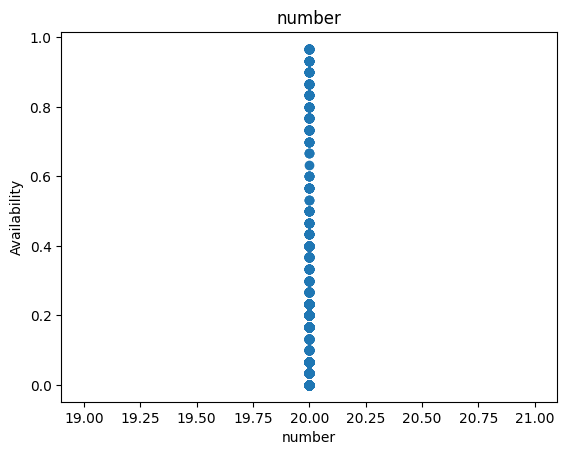

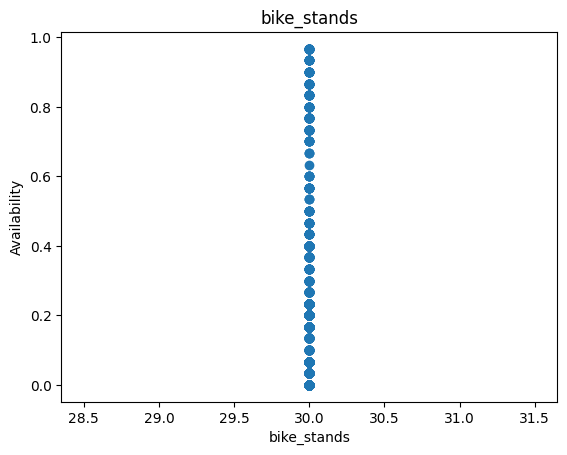

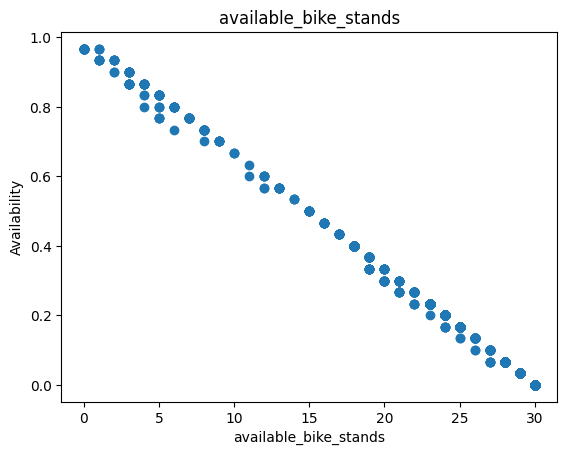

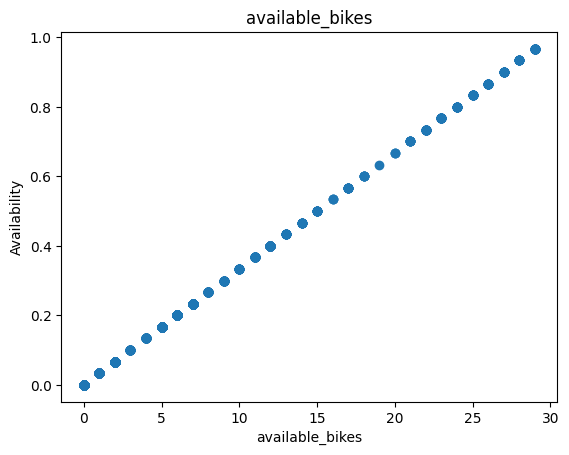

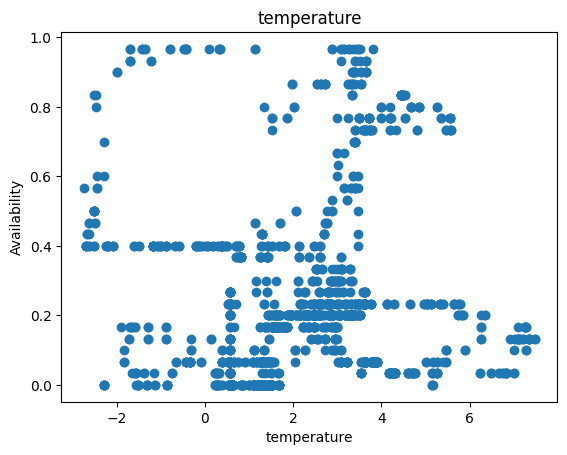

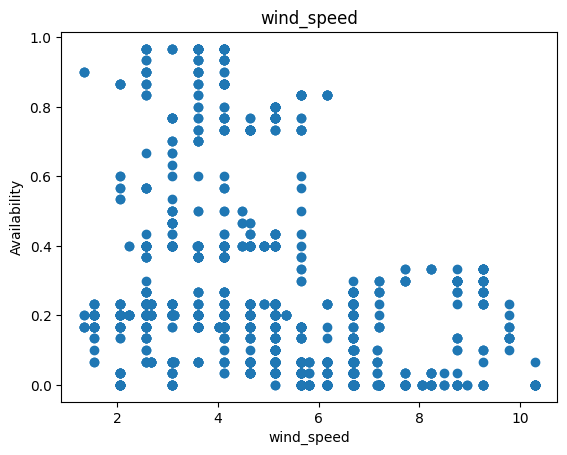

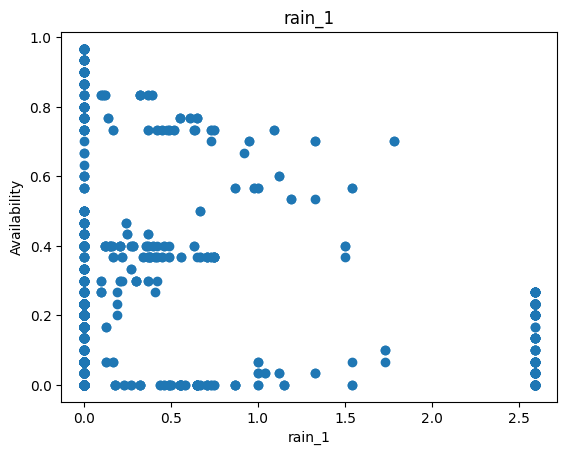

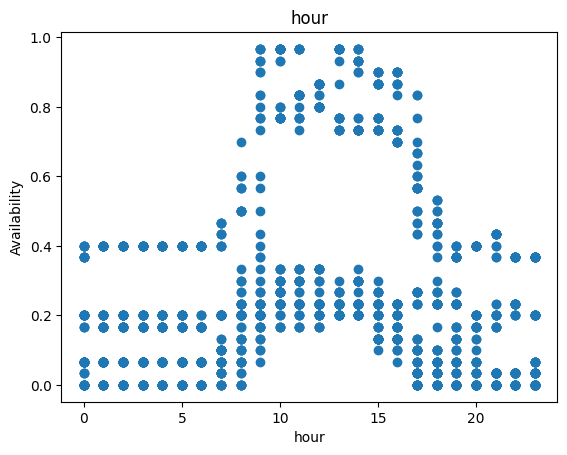

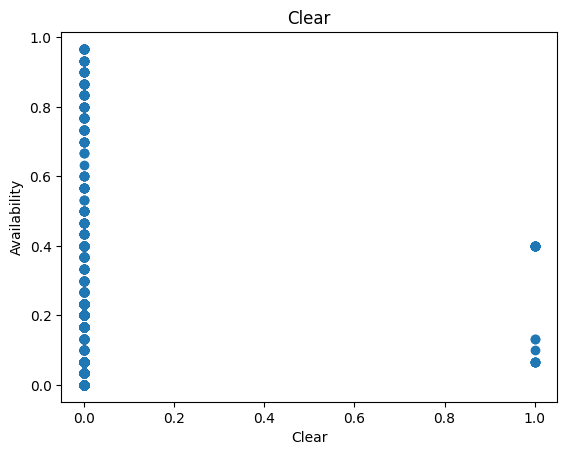

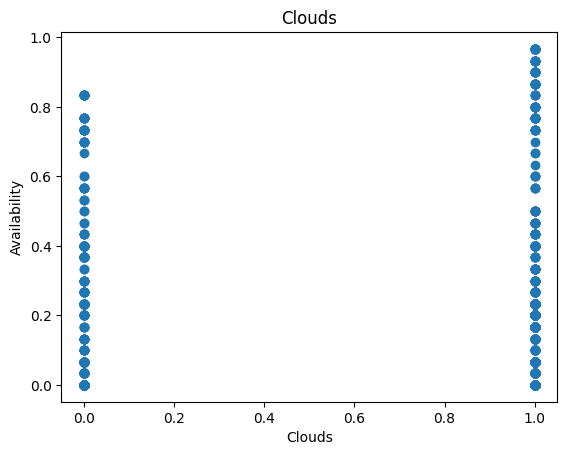

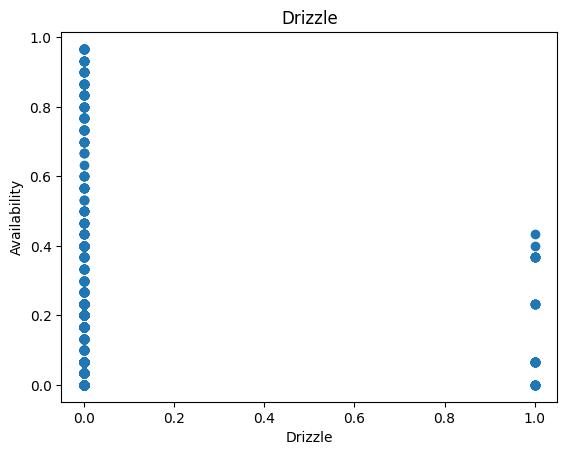

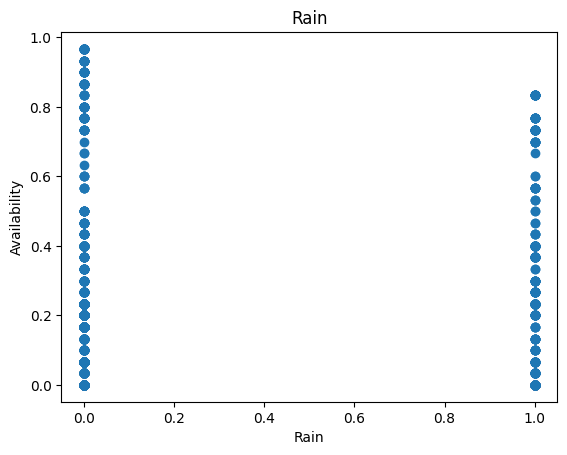

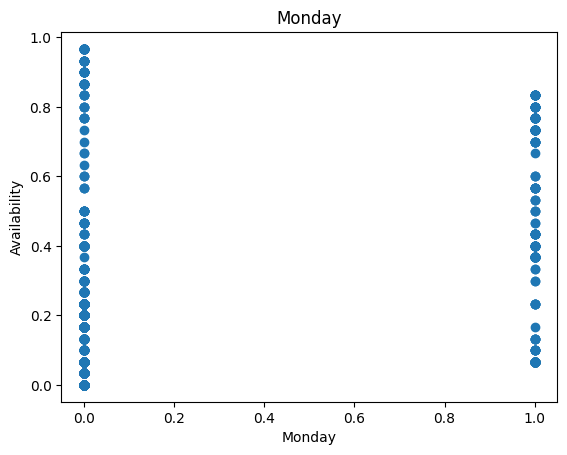

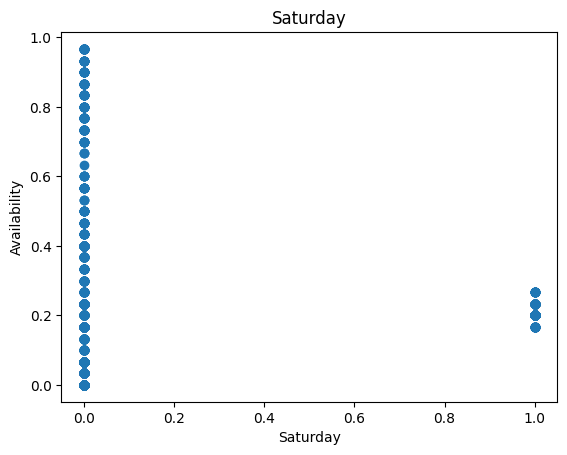

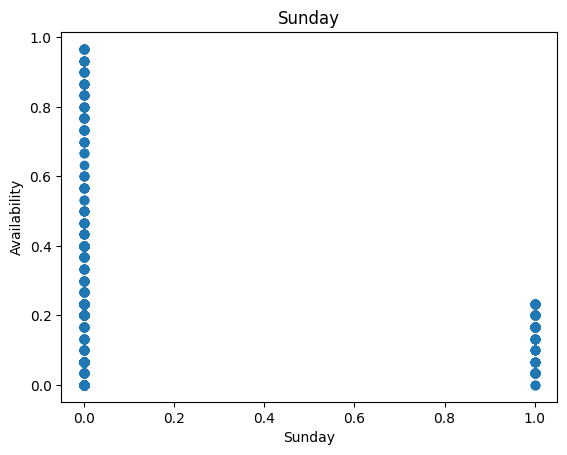

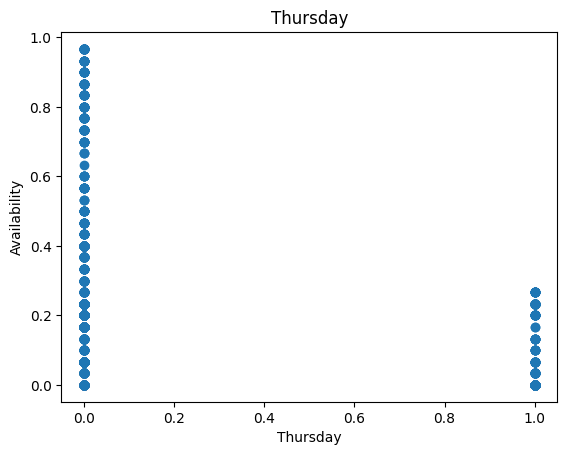

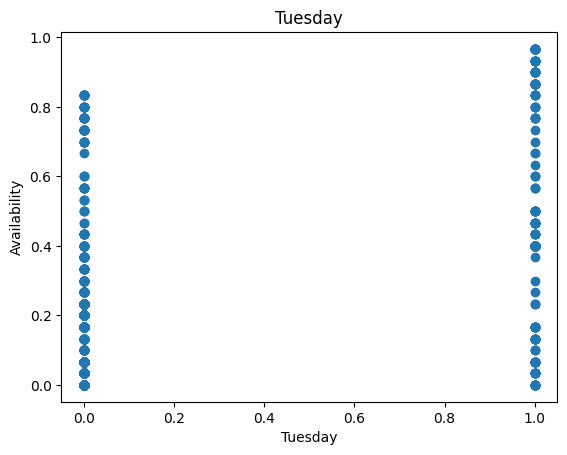

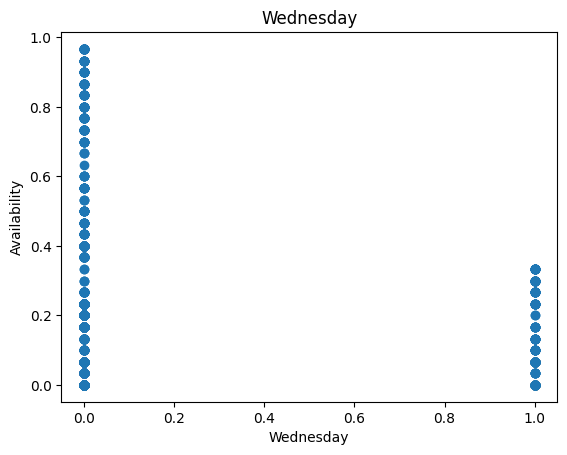

train score : 1.0


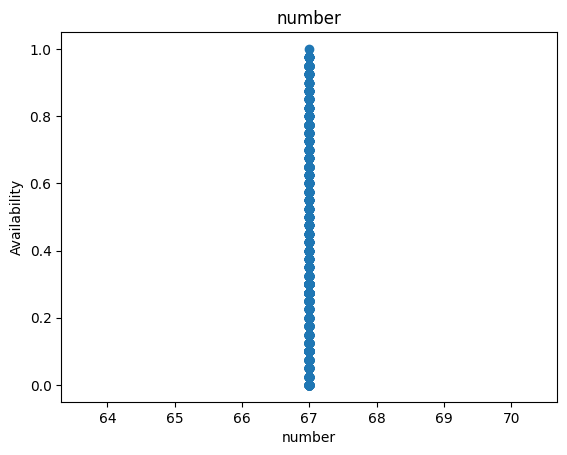

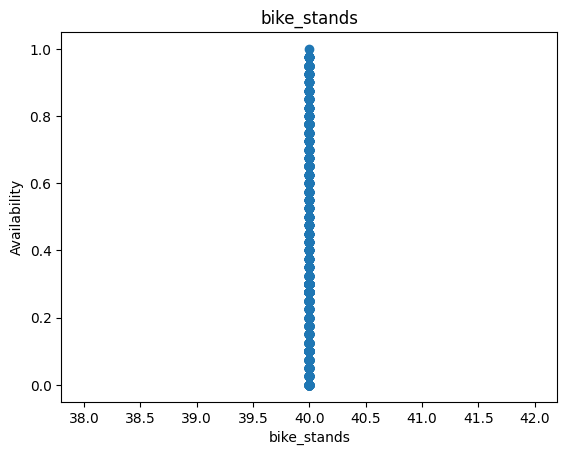

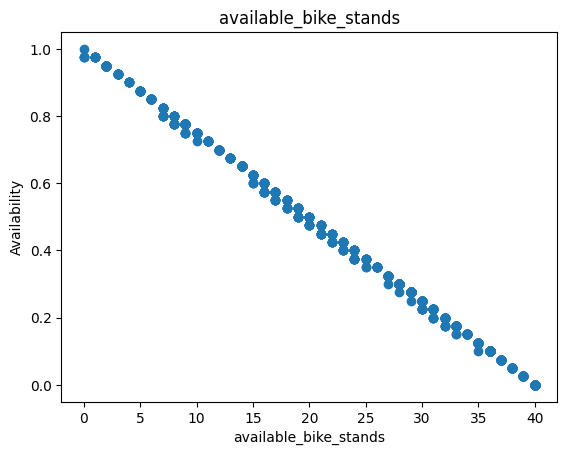

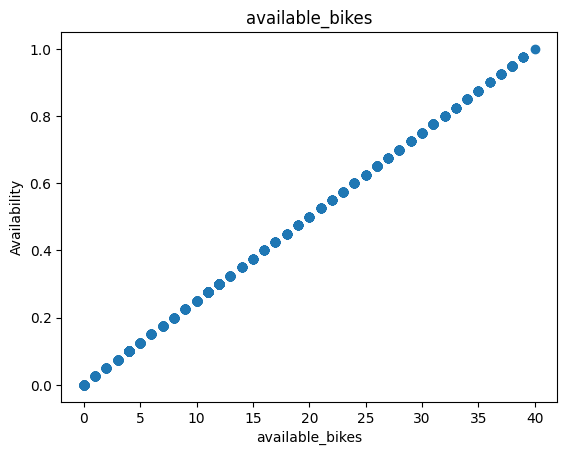

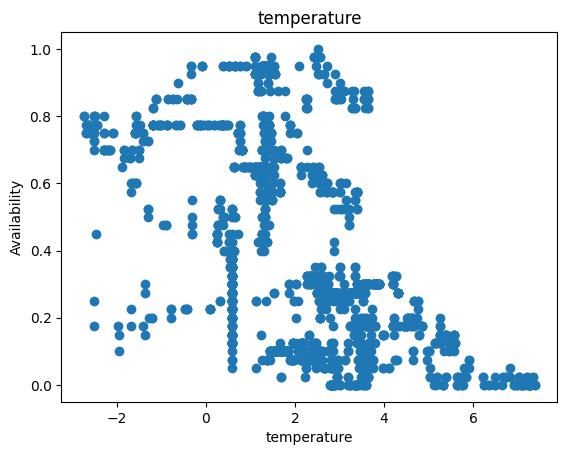

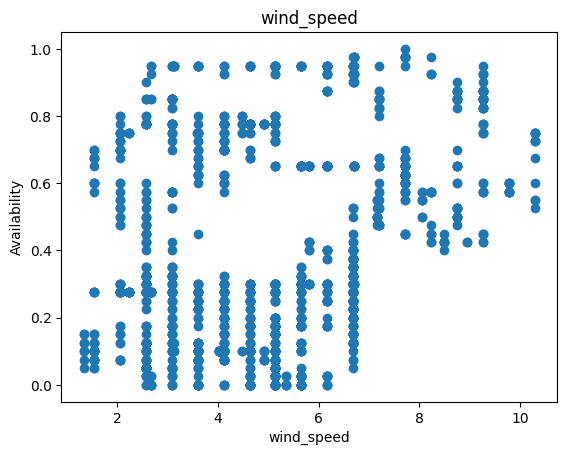

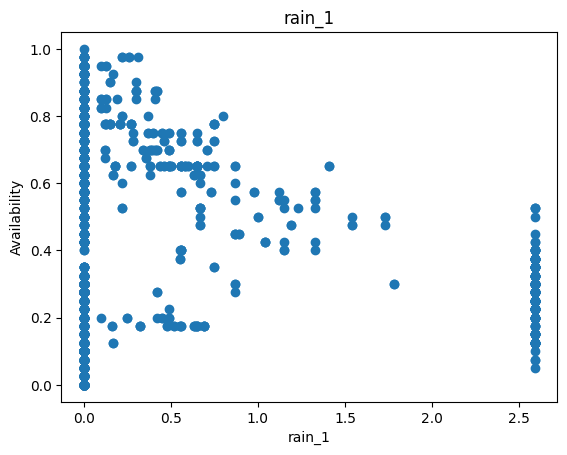

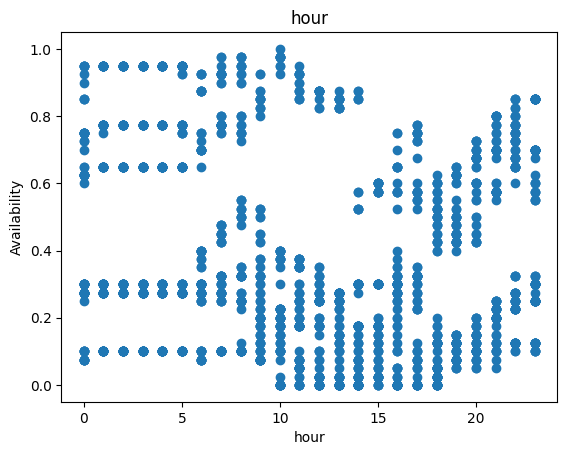

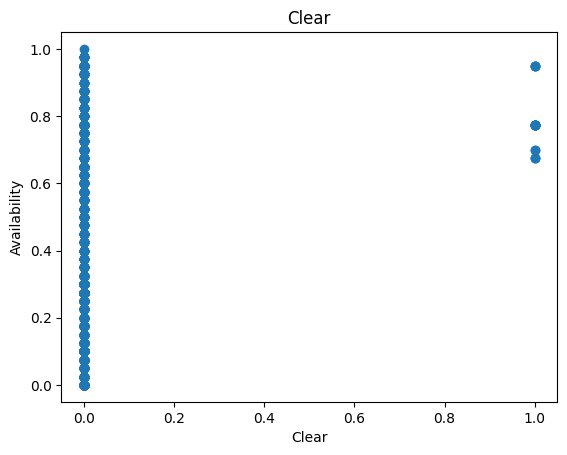

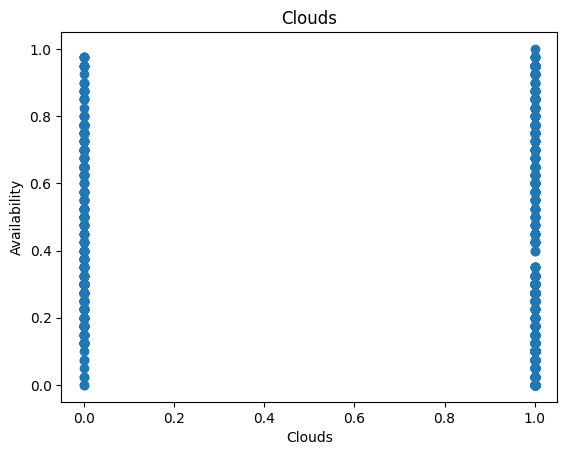

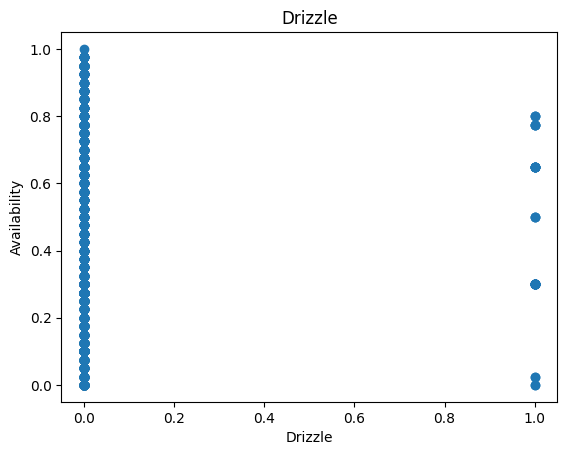

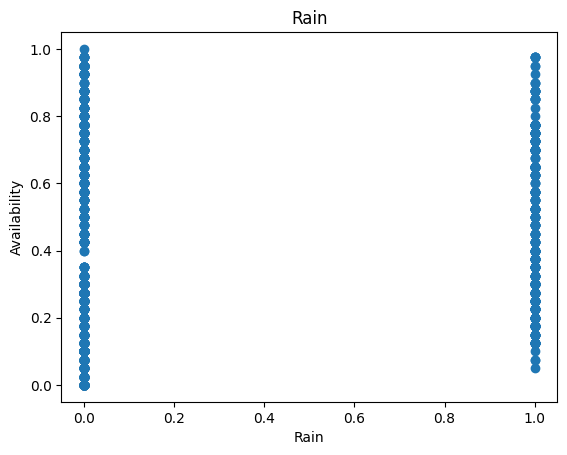

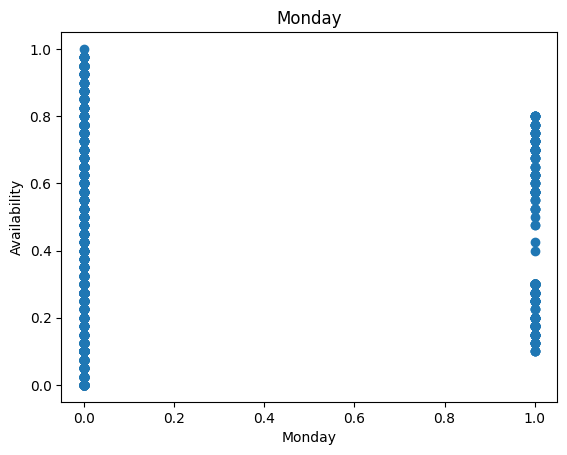

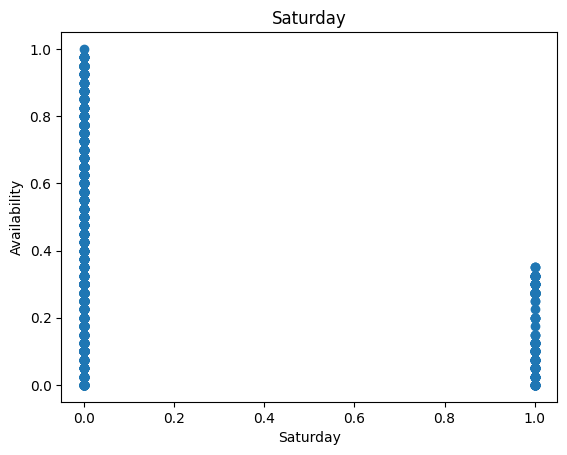

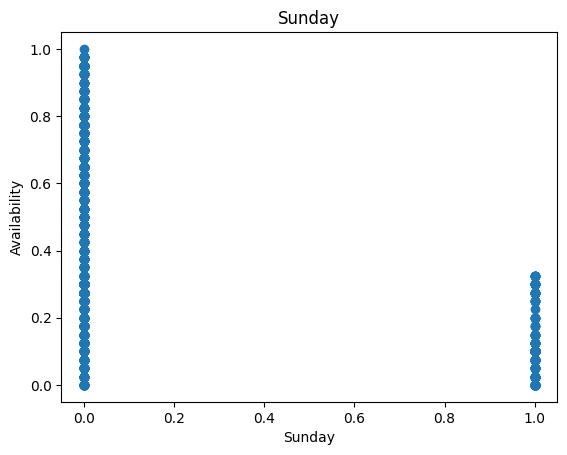

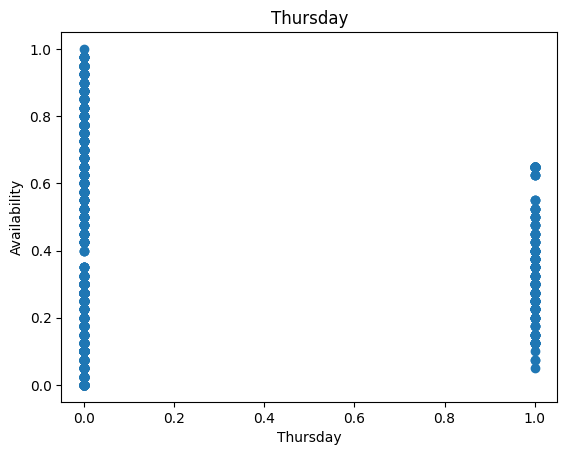

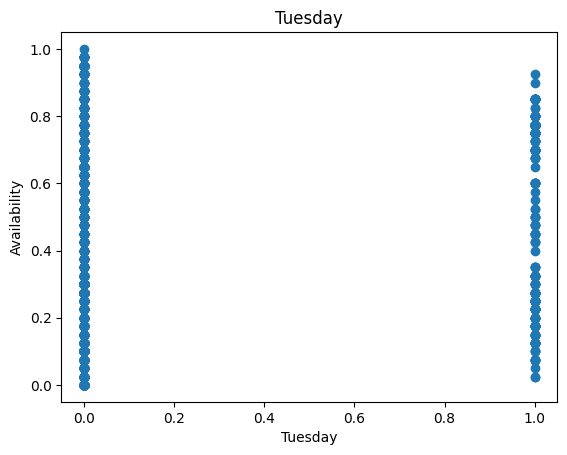

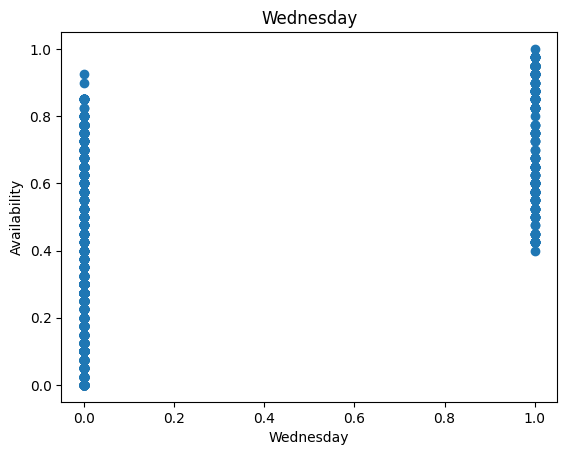

train score : 1.0


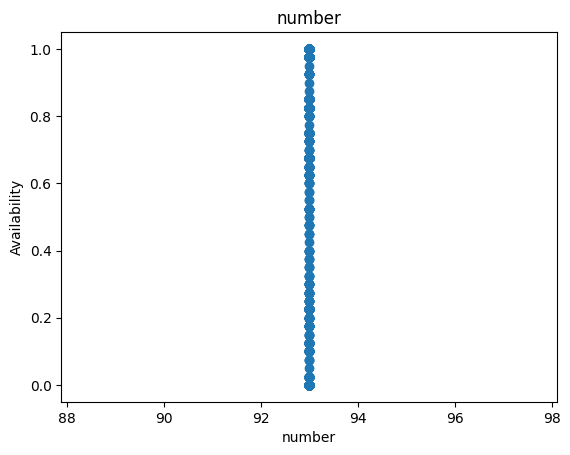

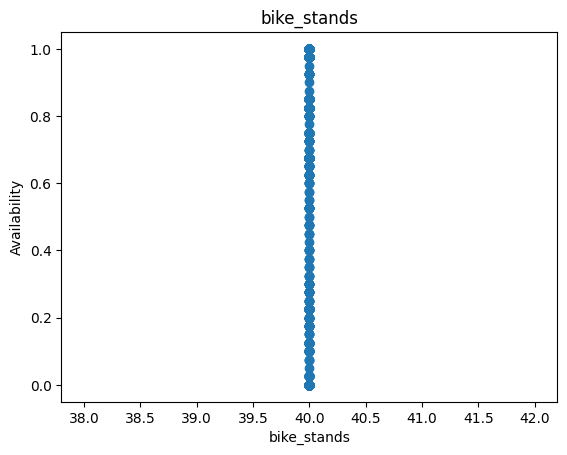

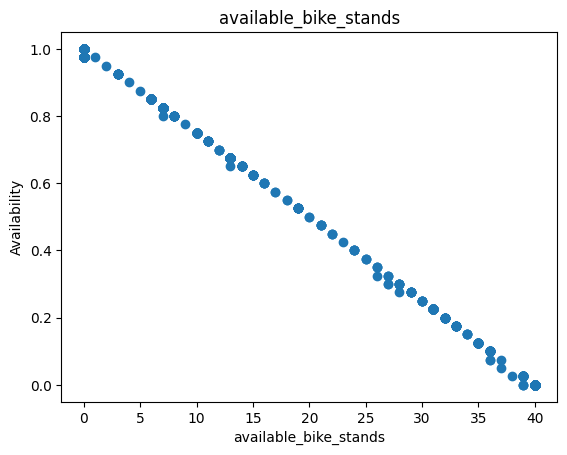

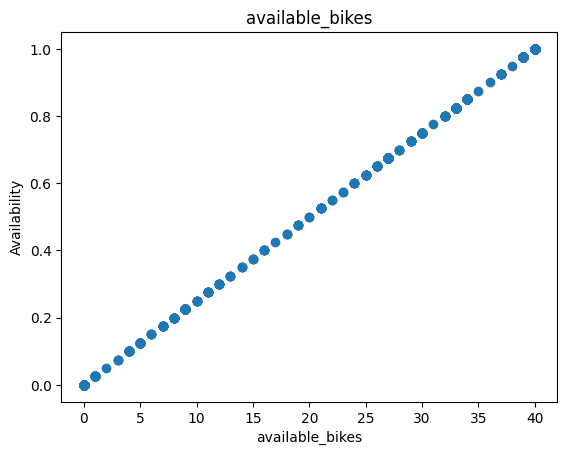

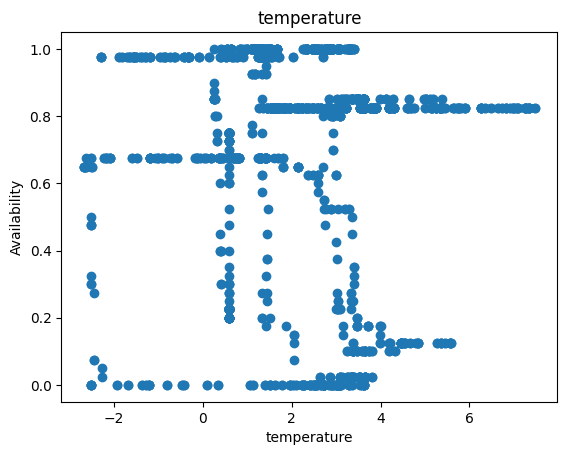

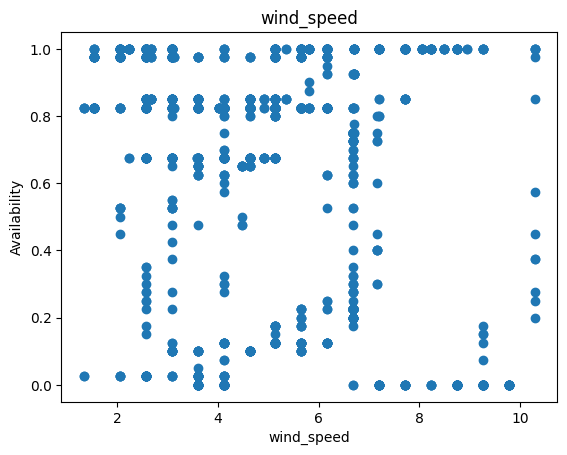

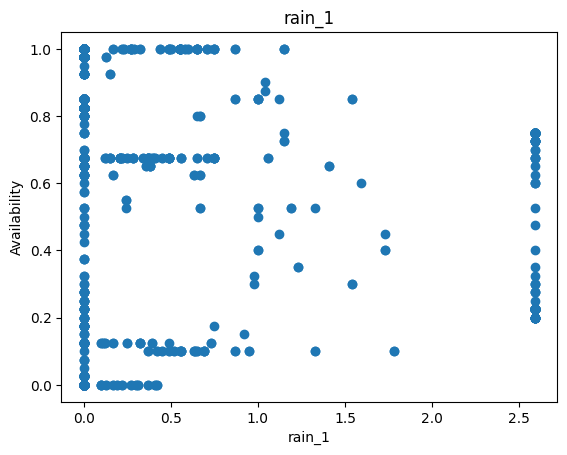

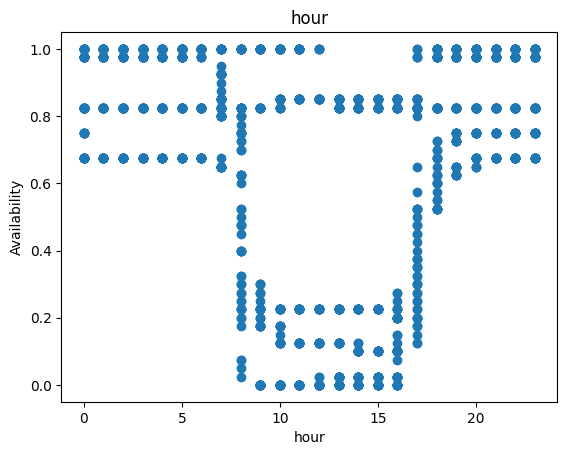

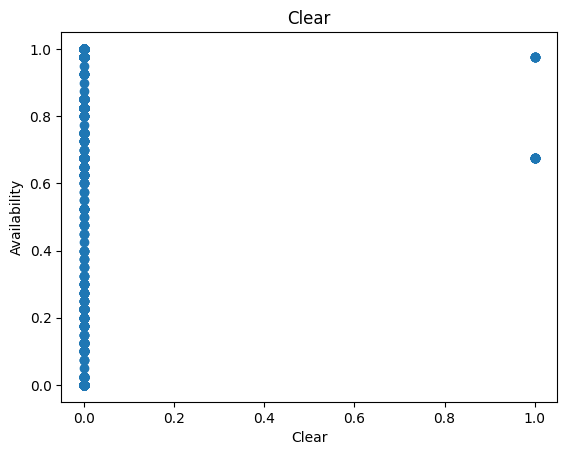

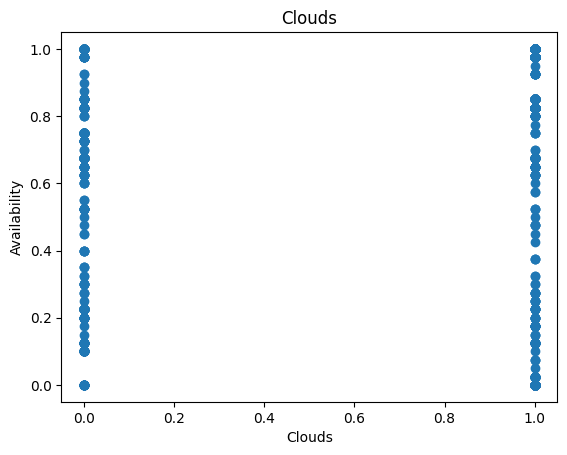

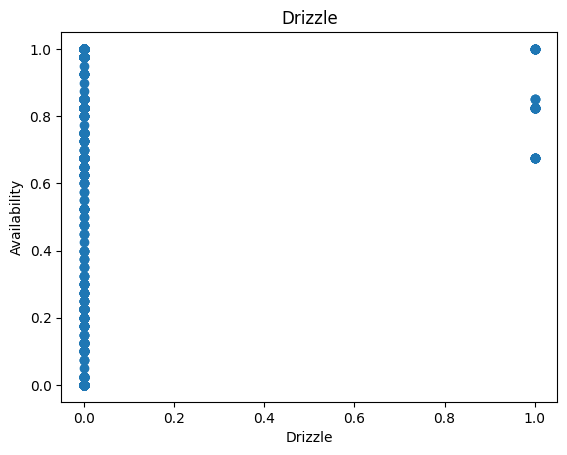

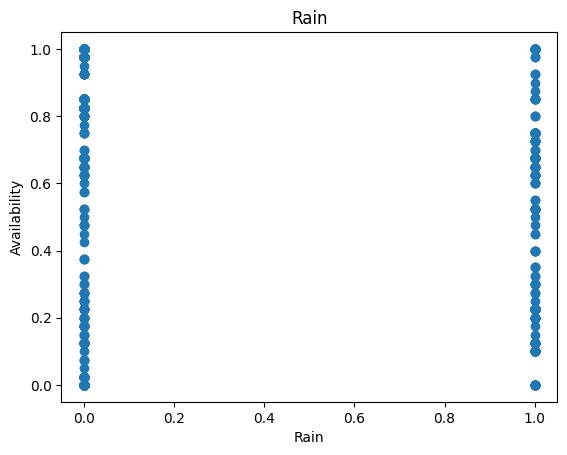

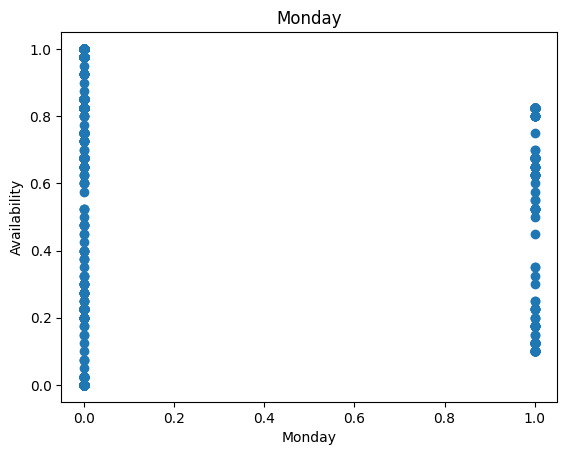

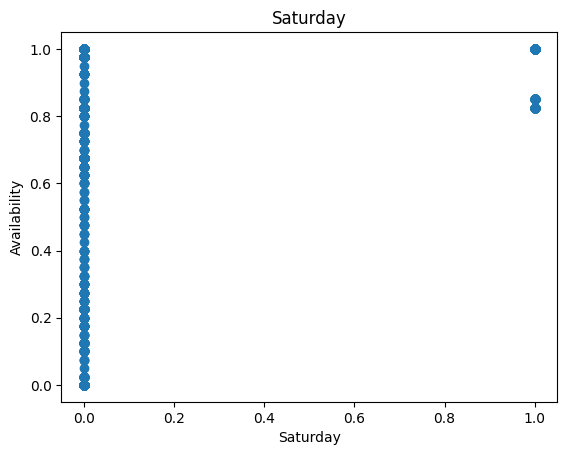

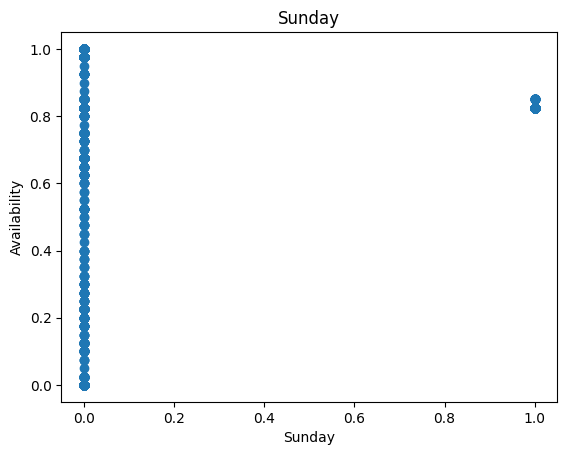

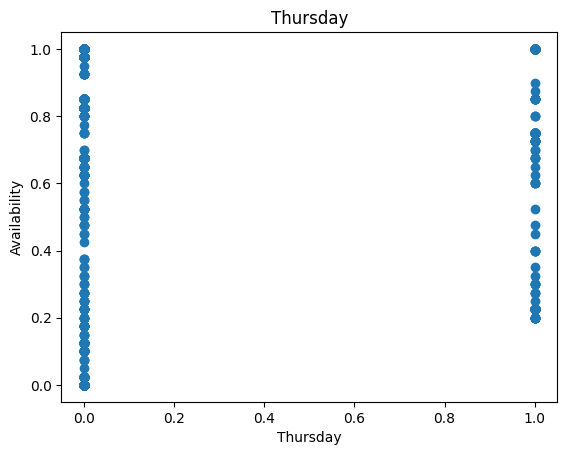

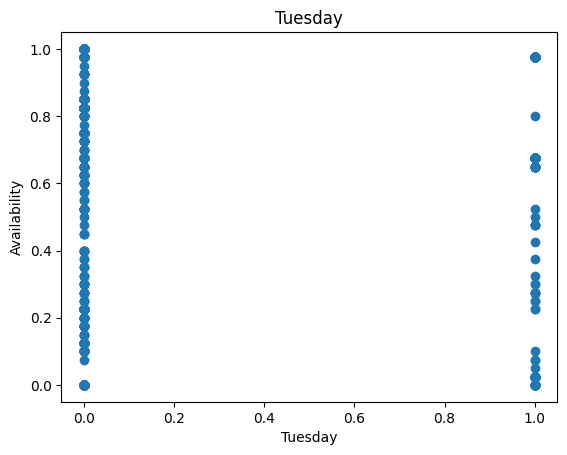

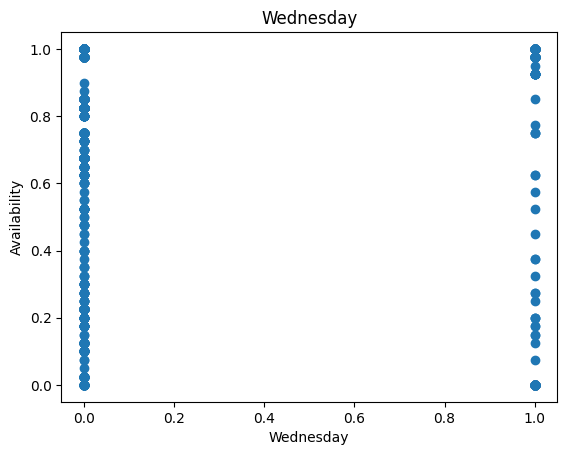

train score : 1.0


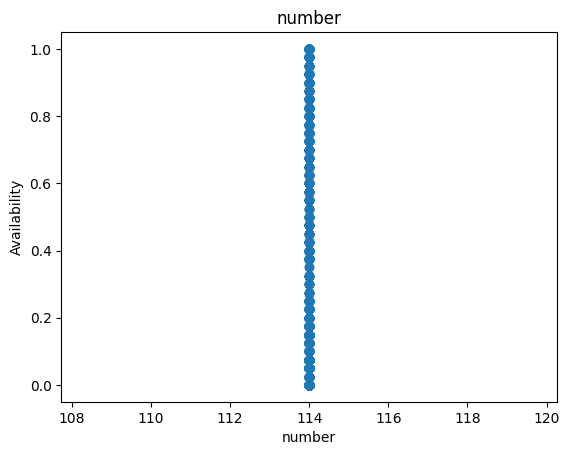

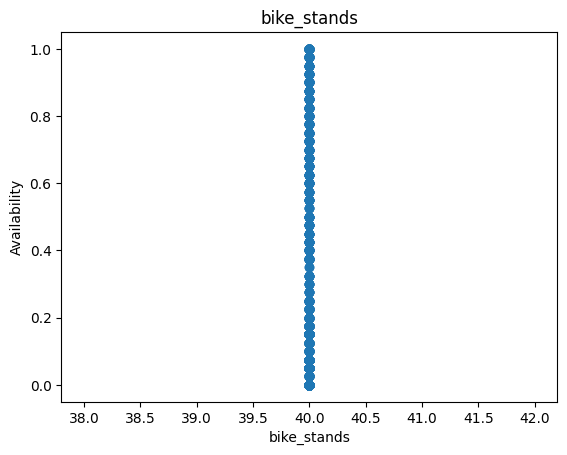

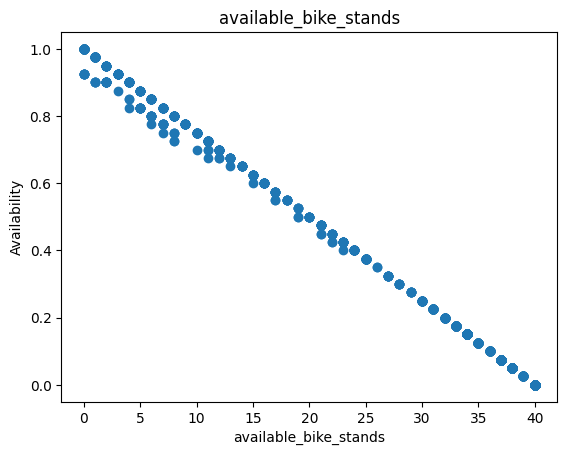

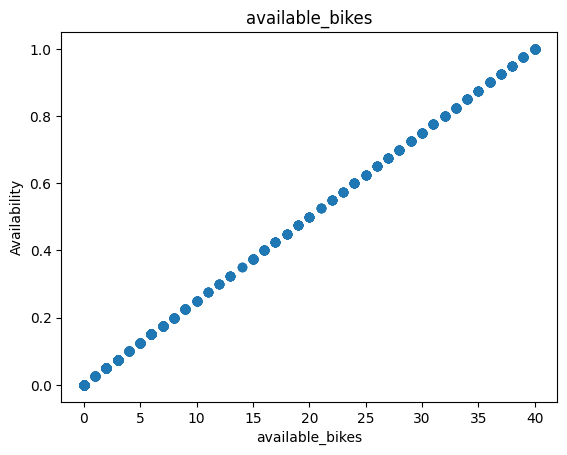

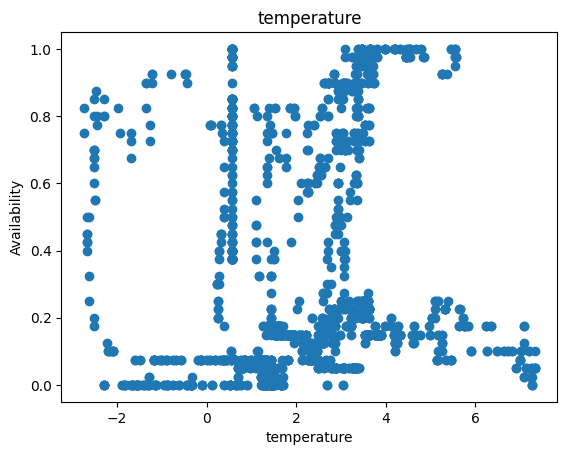

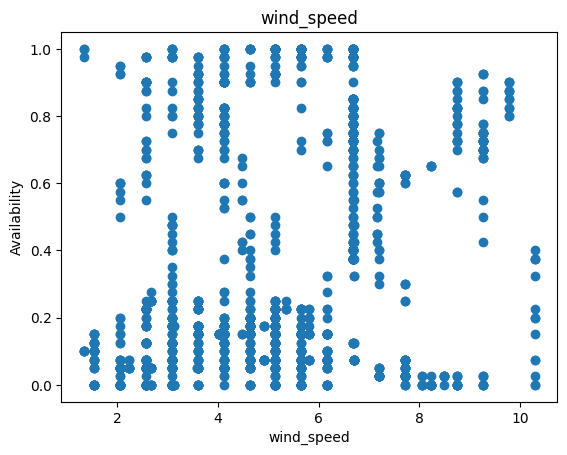

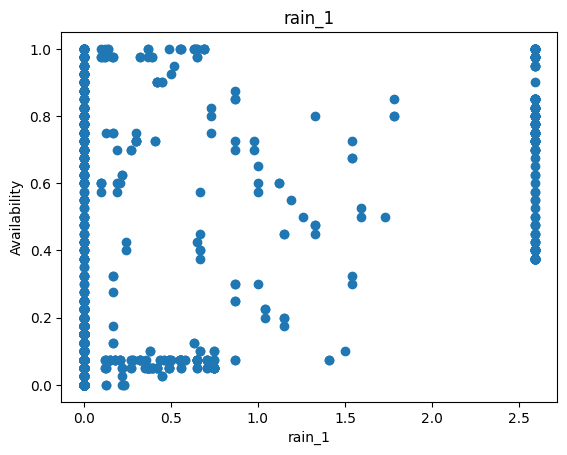

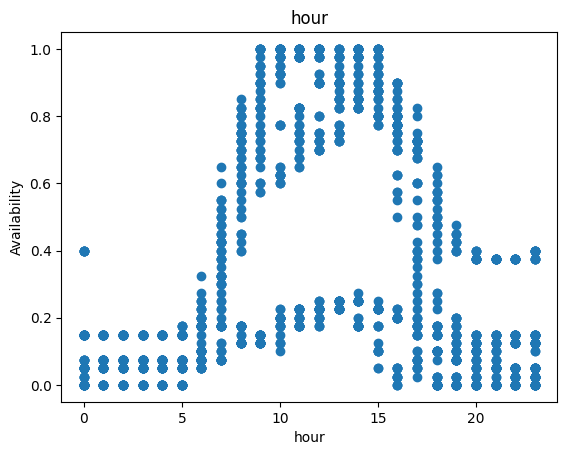

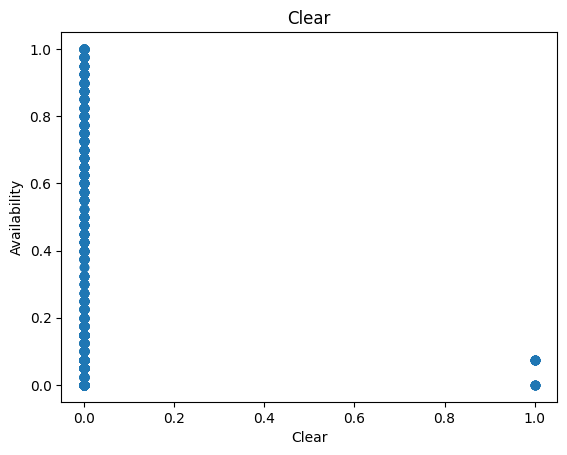

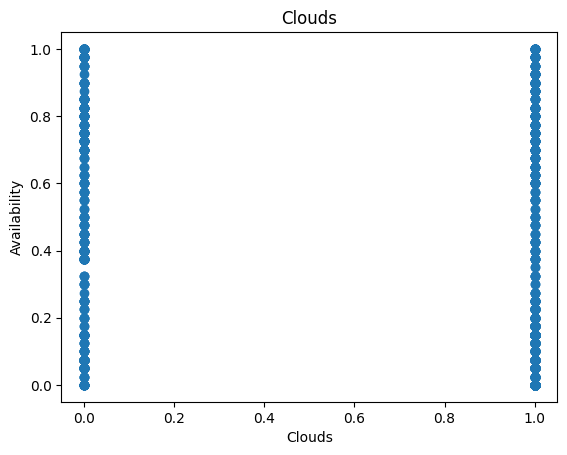

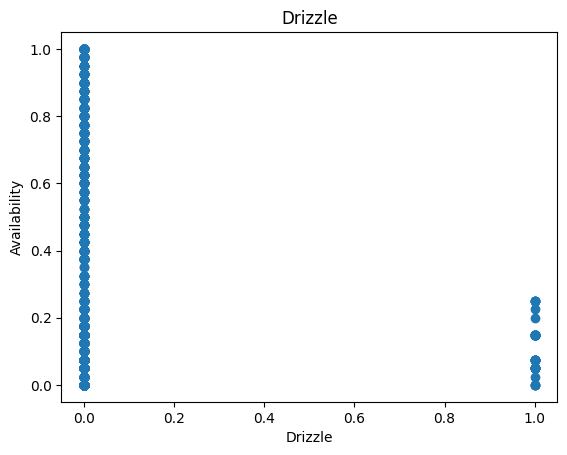

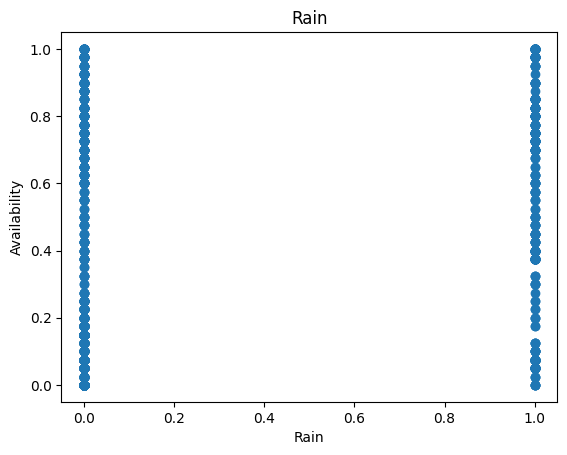

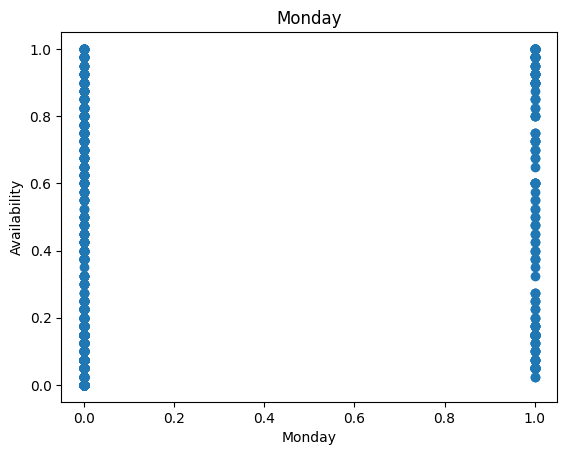

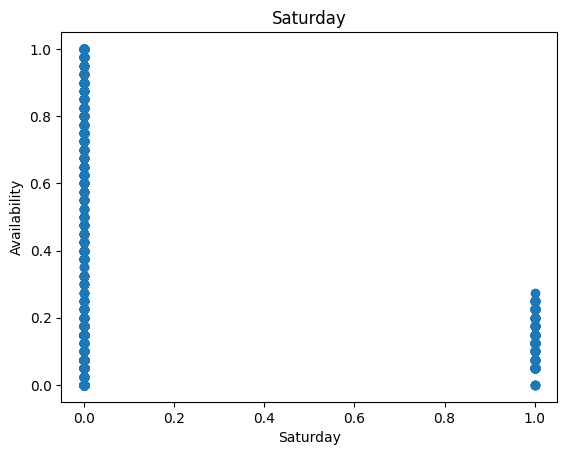

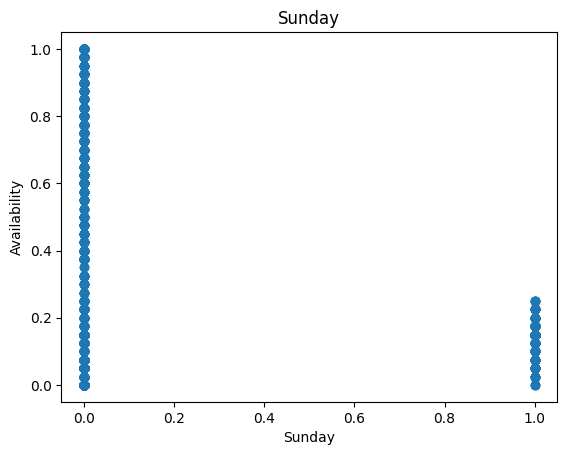

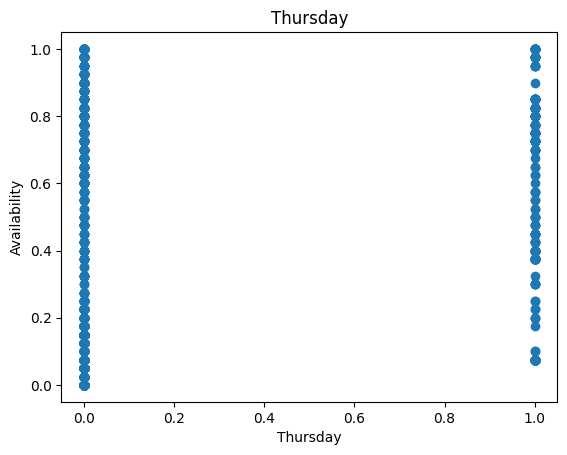

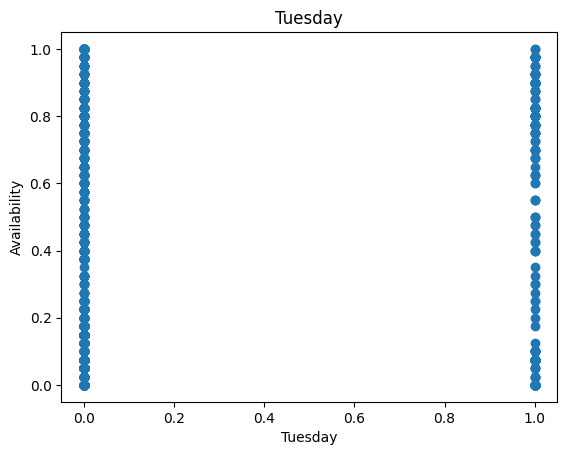

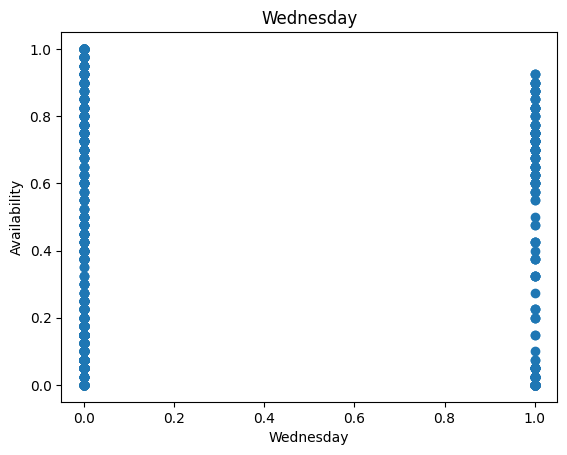

train score : 1.0


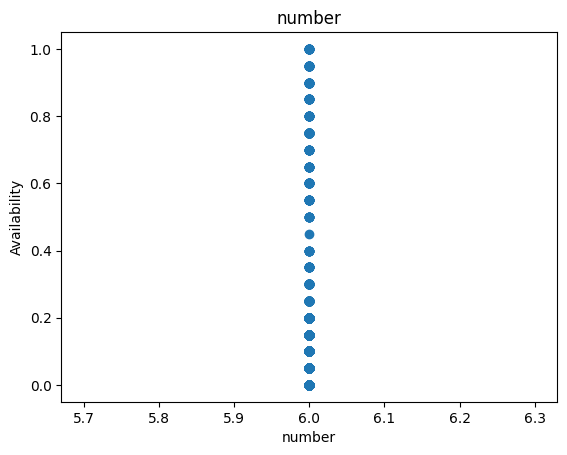

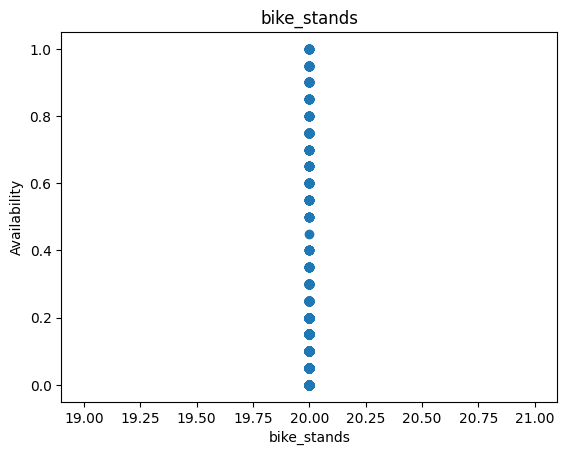

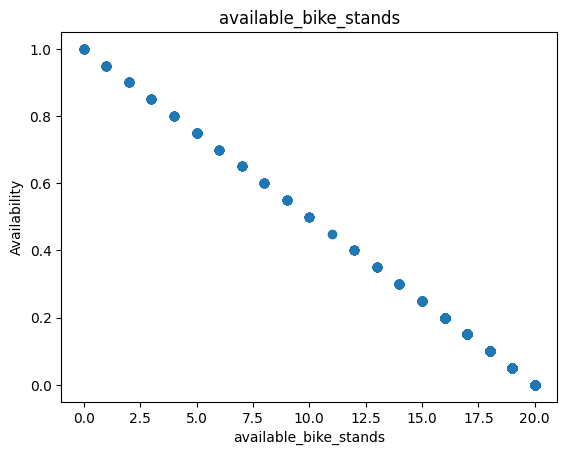

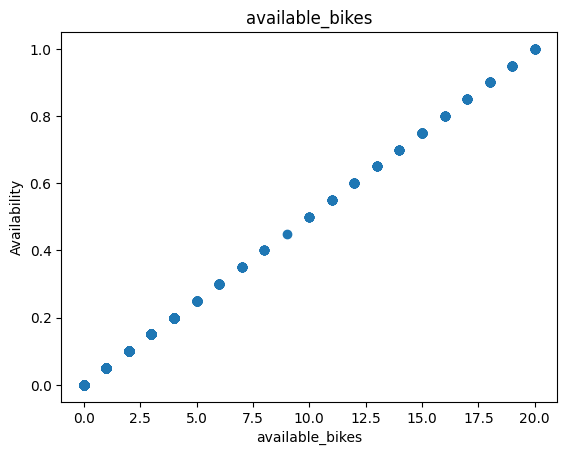

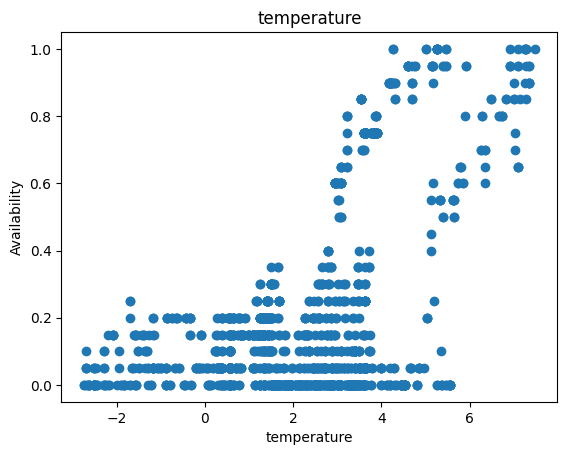

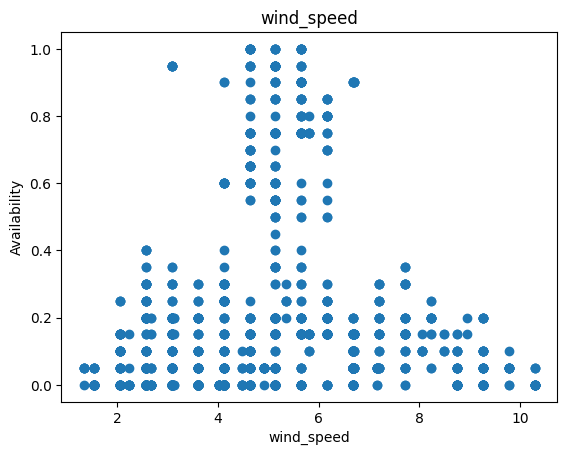

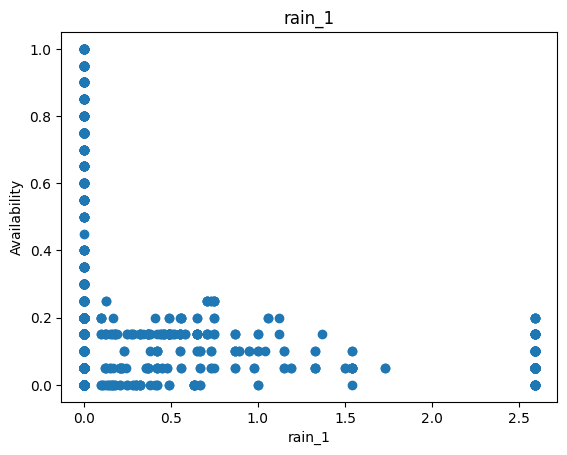

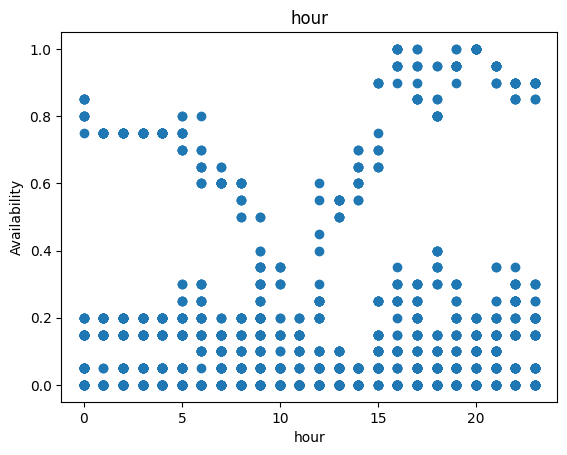

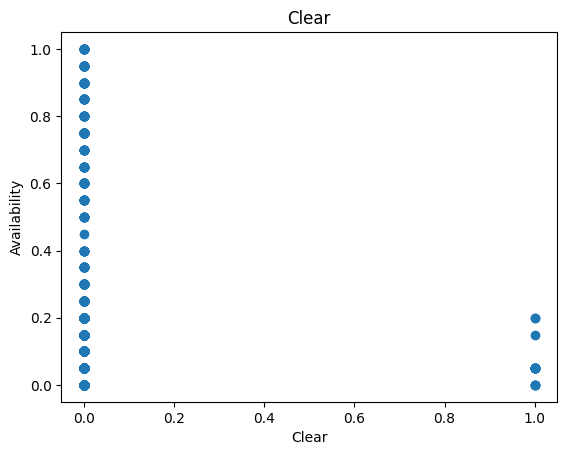

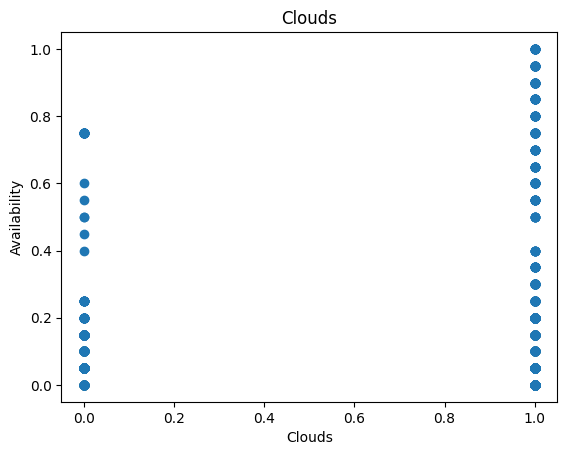

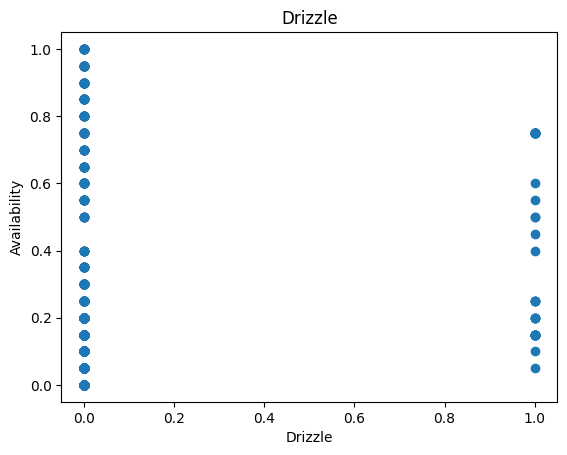

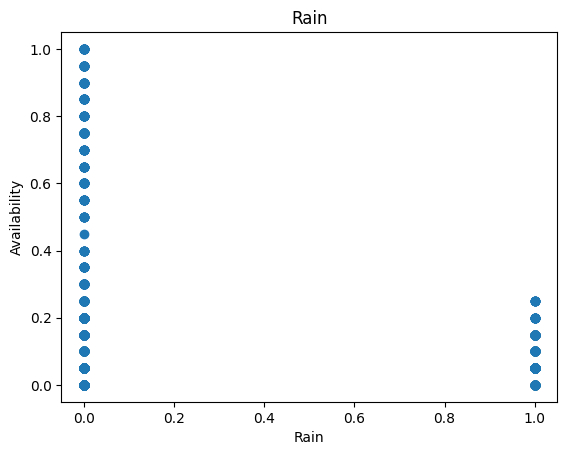

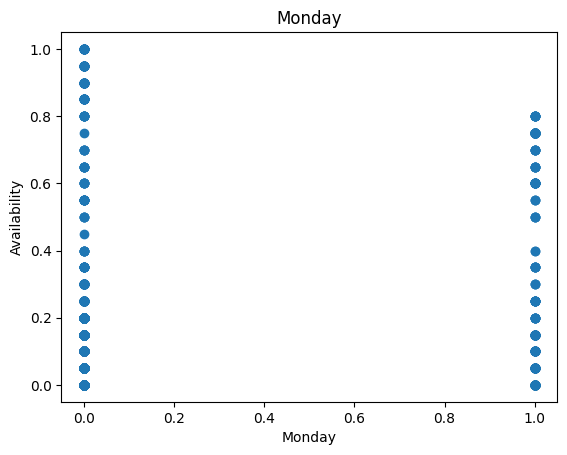

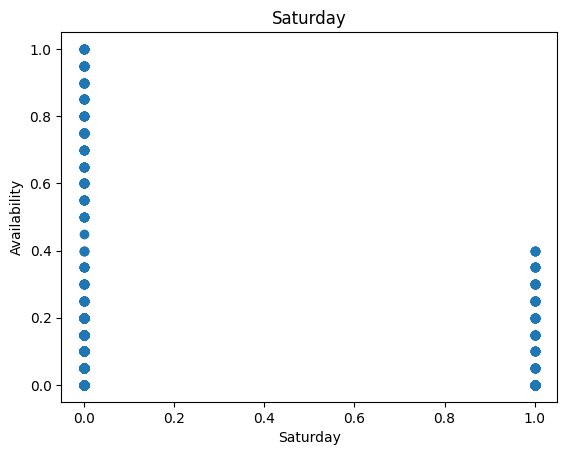

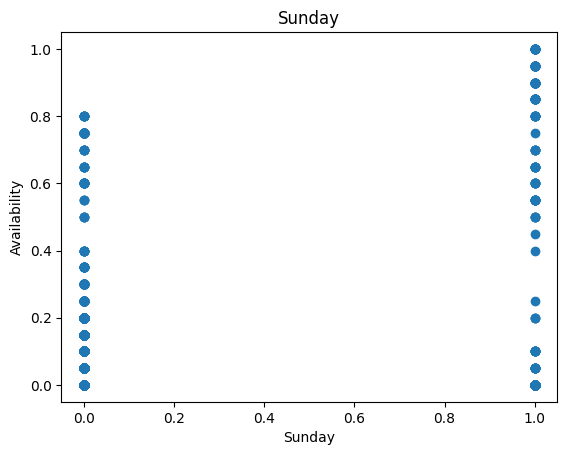

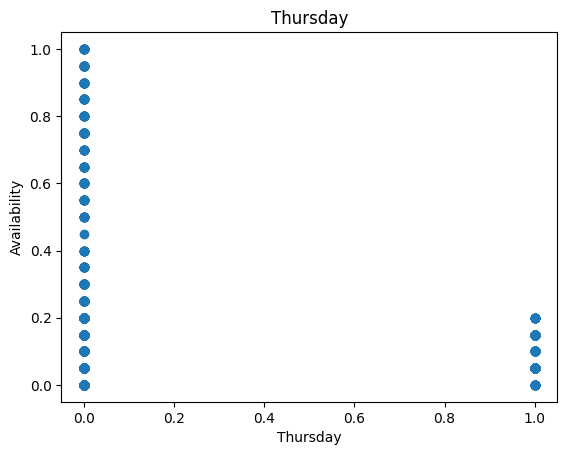

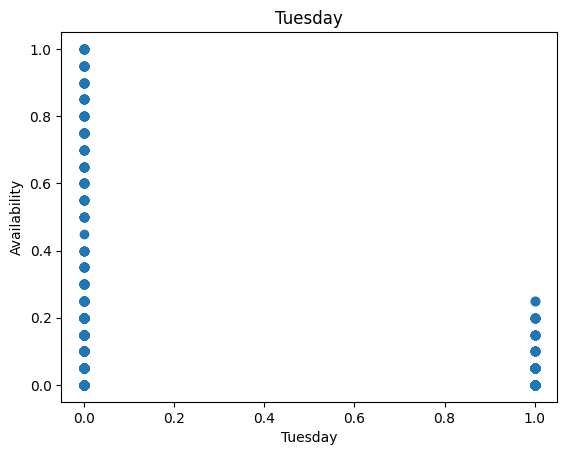

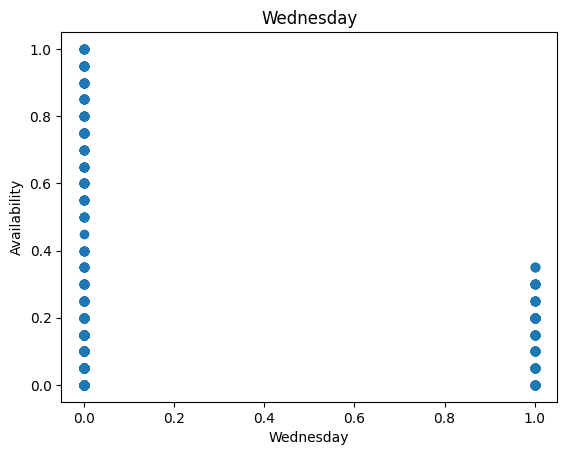

train score : 1.0


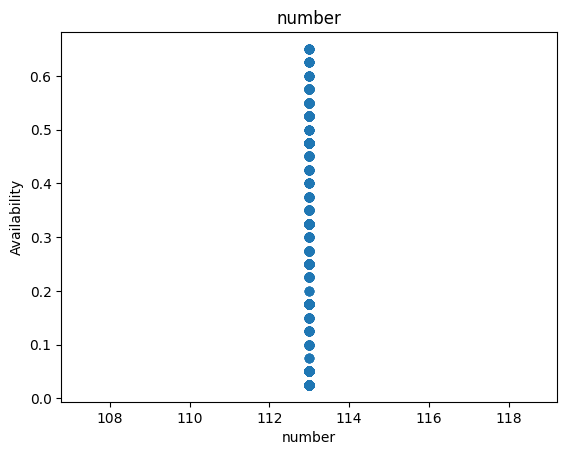

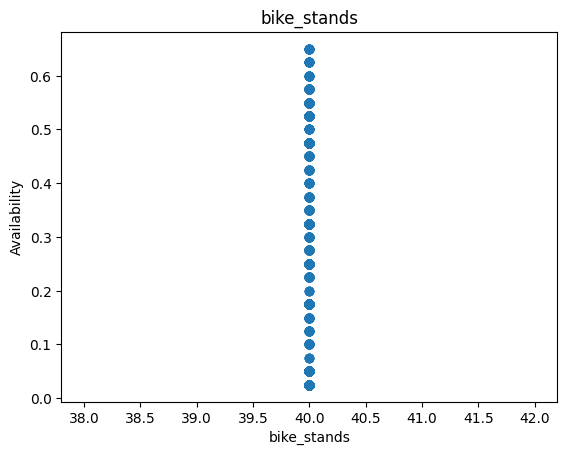

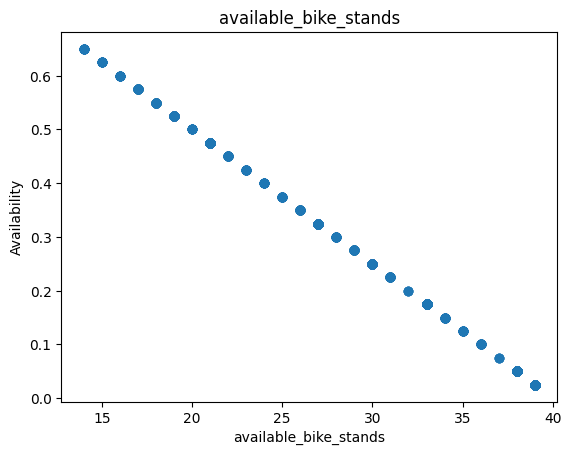

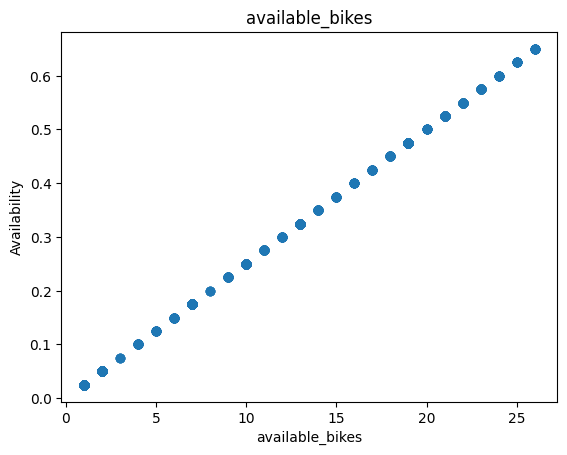

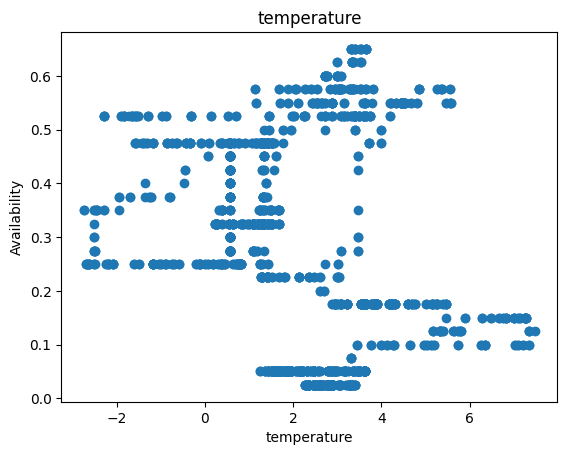

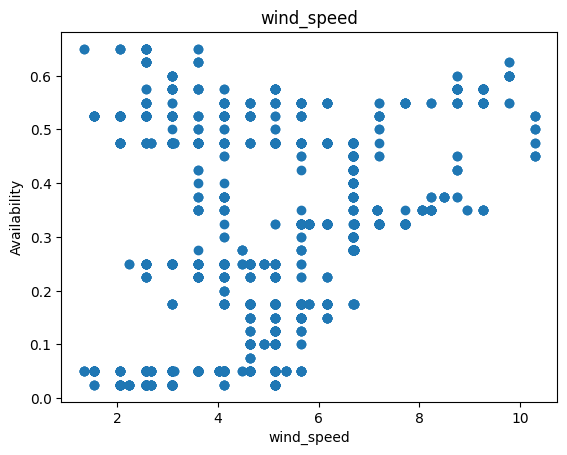

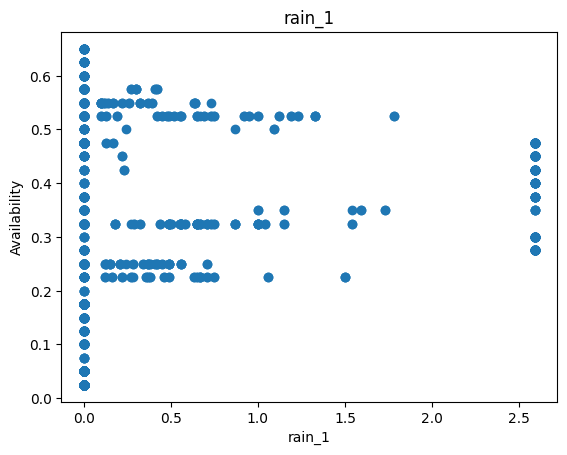

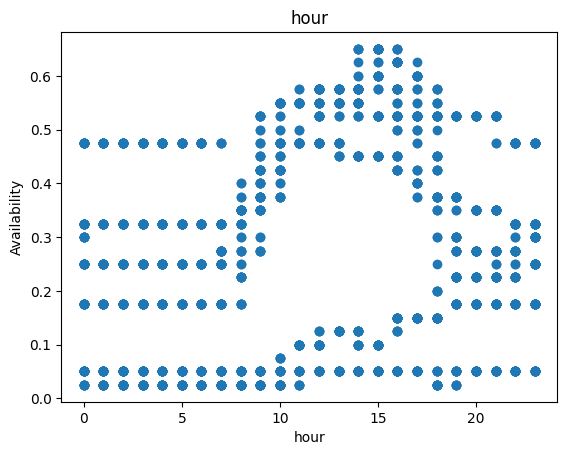

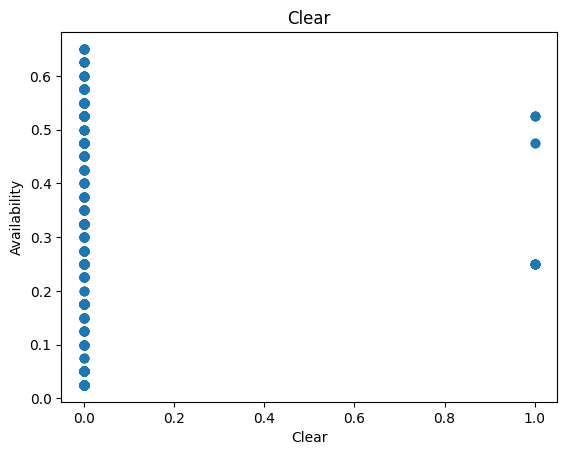

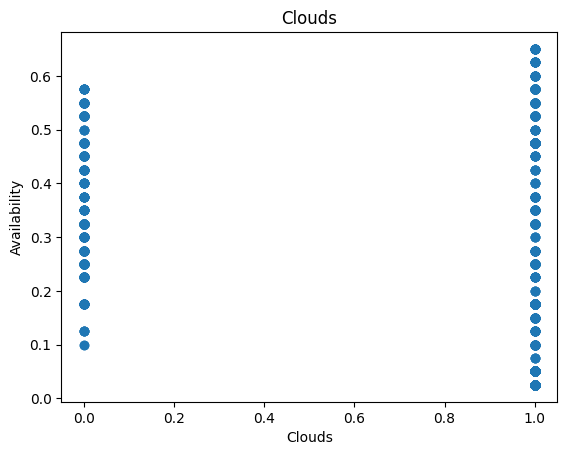

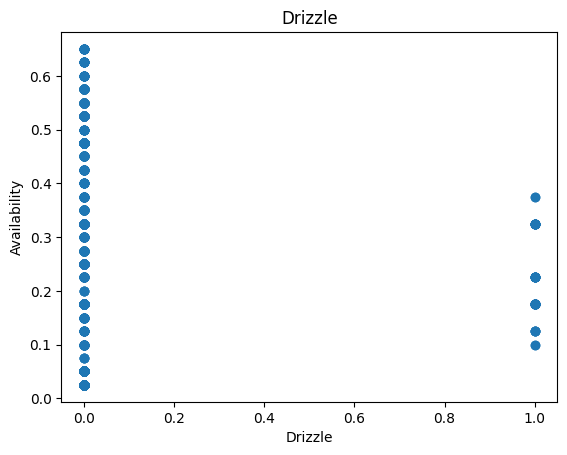

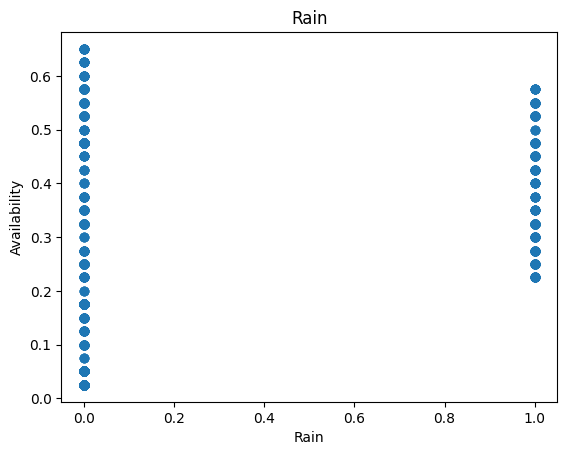

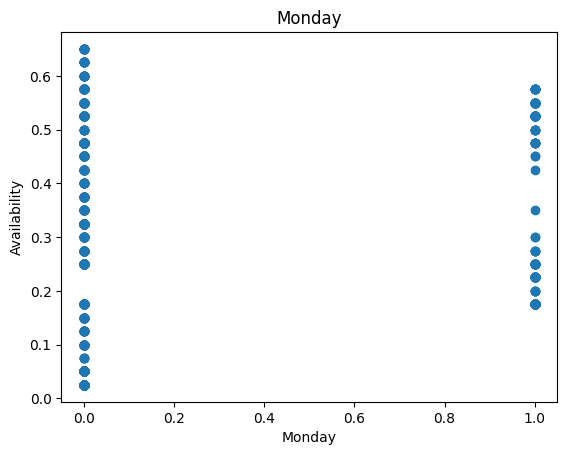

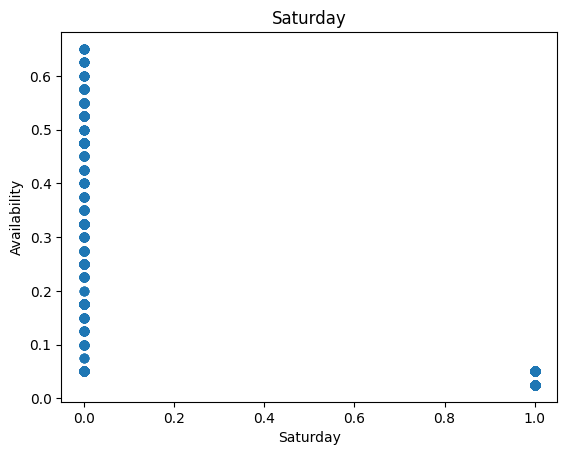

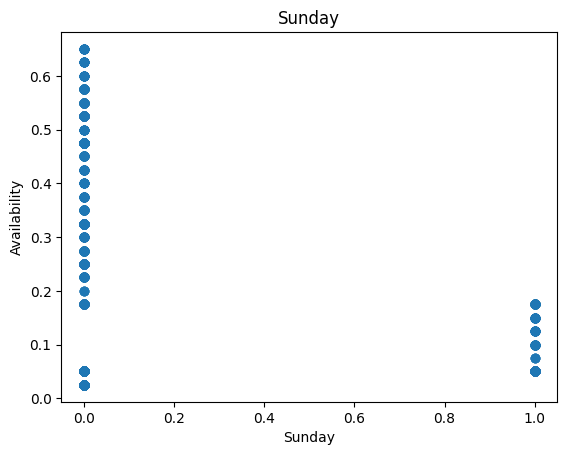

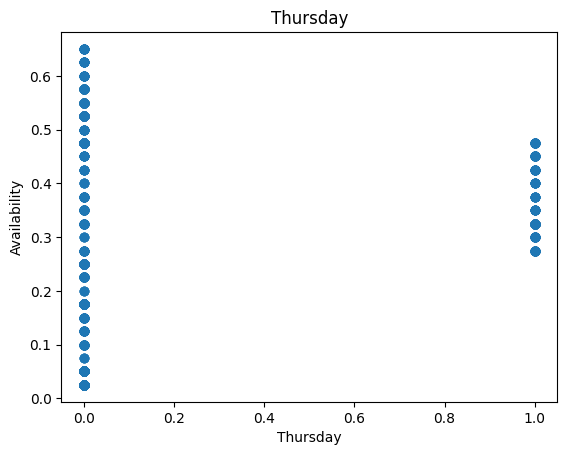

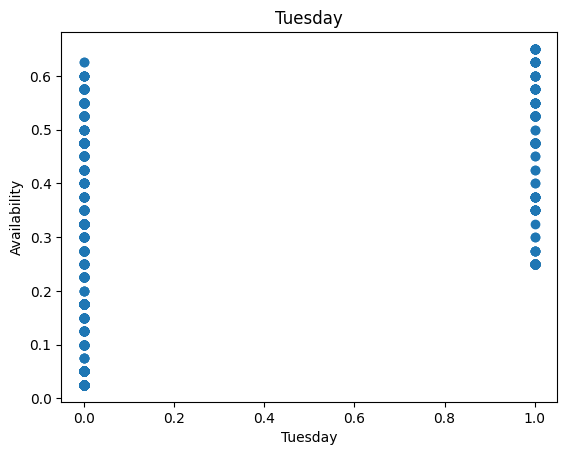

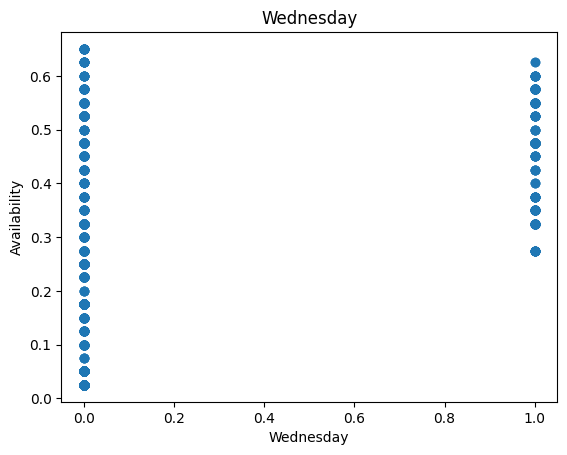

train score : 1.0


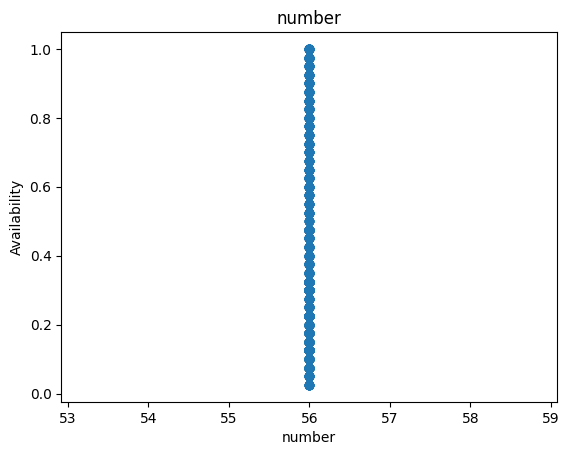

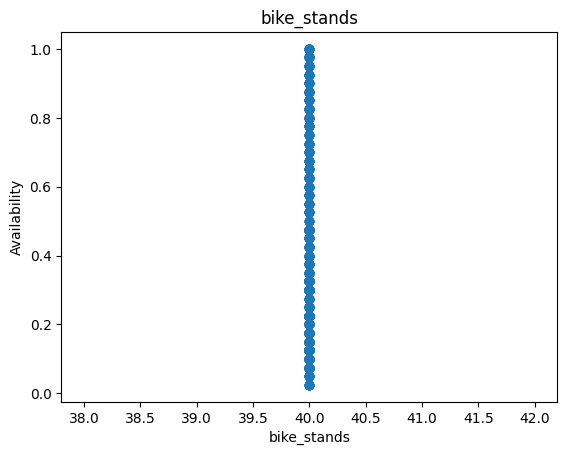

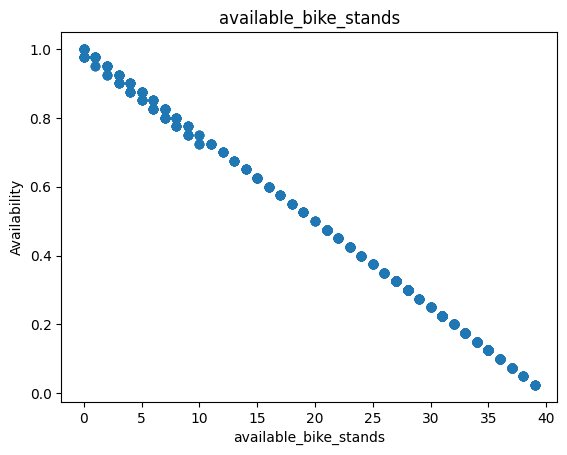

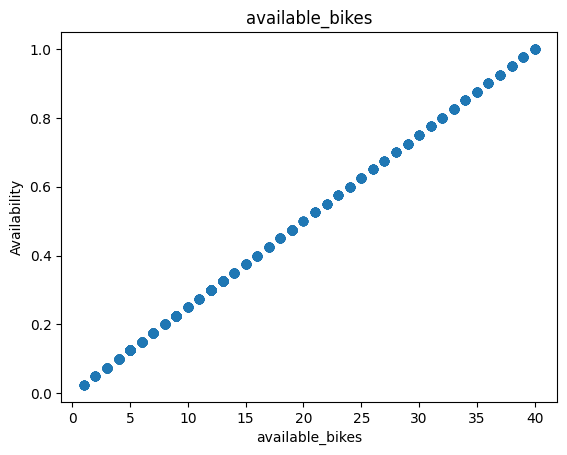

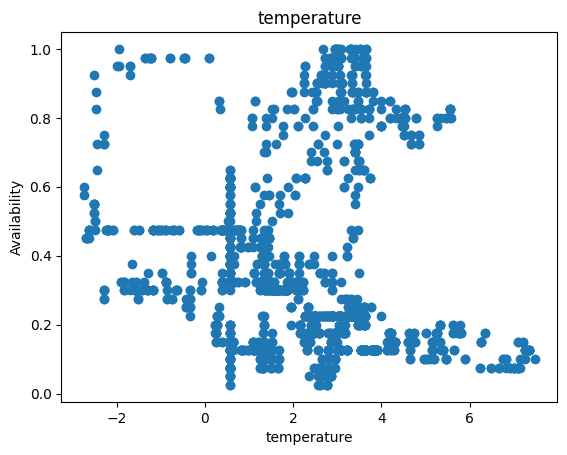

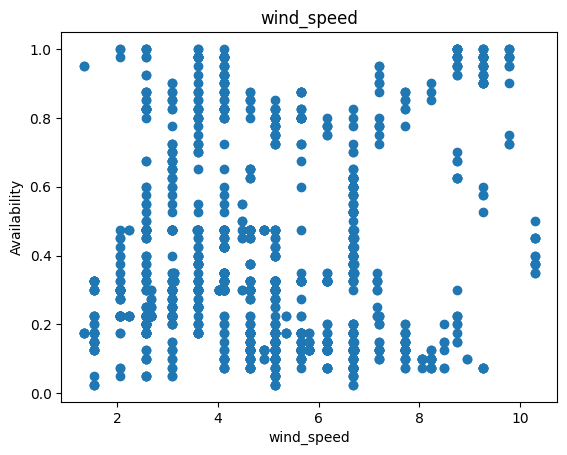

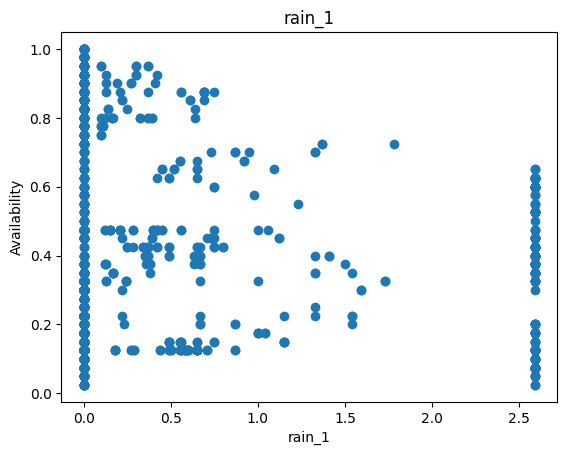

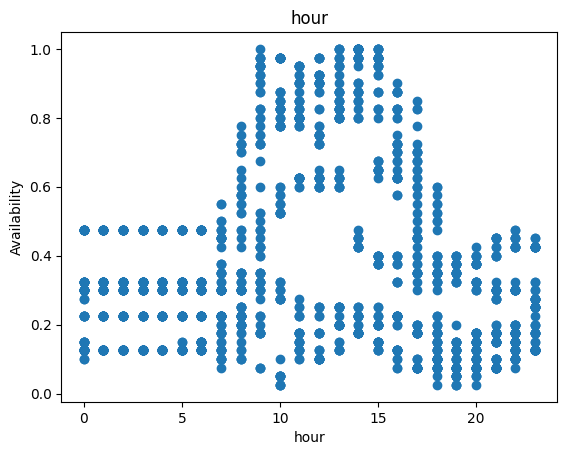

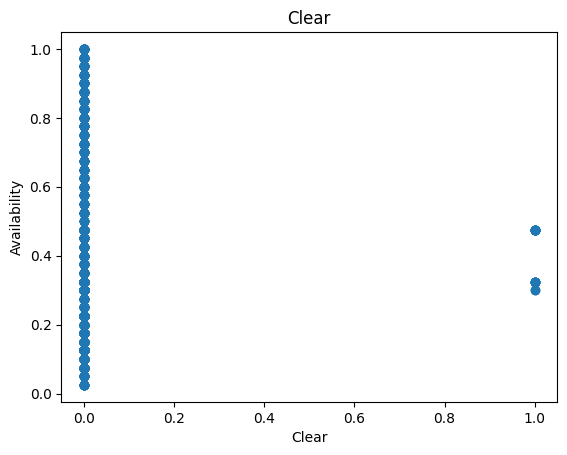

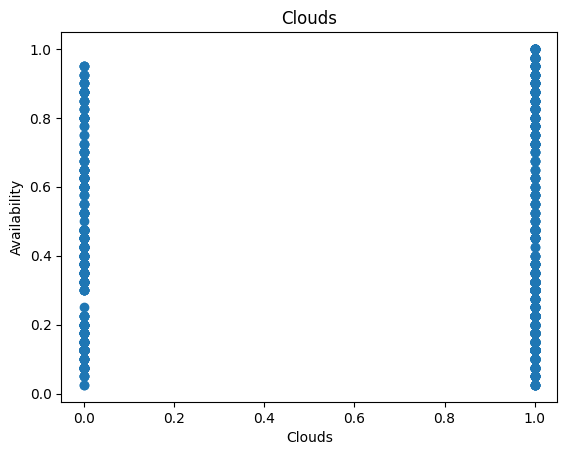

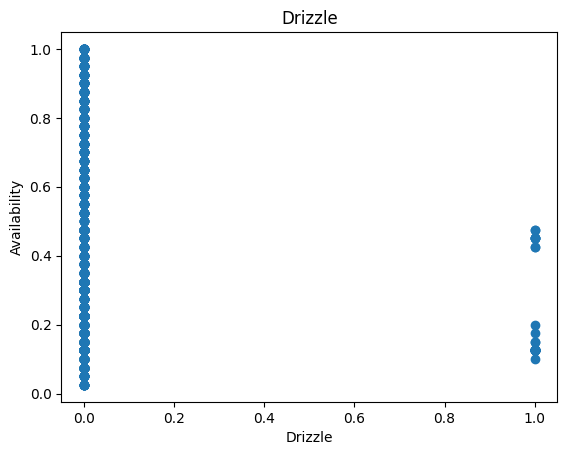

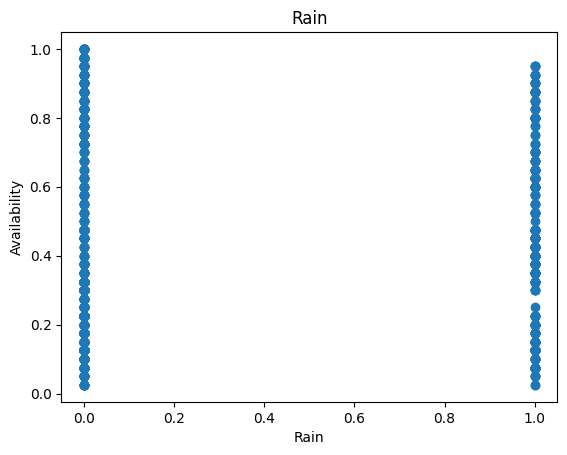

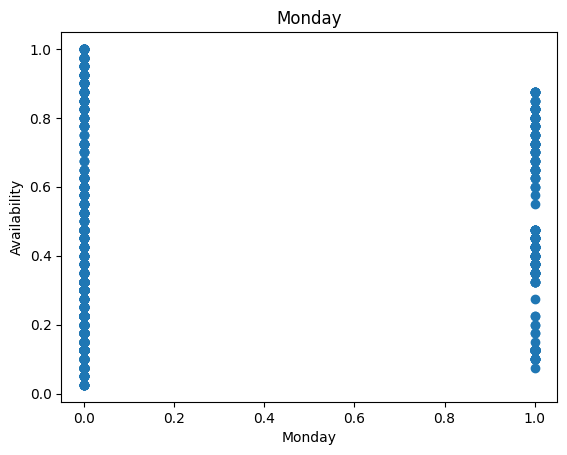

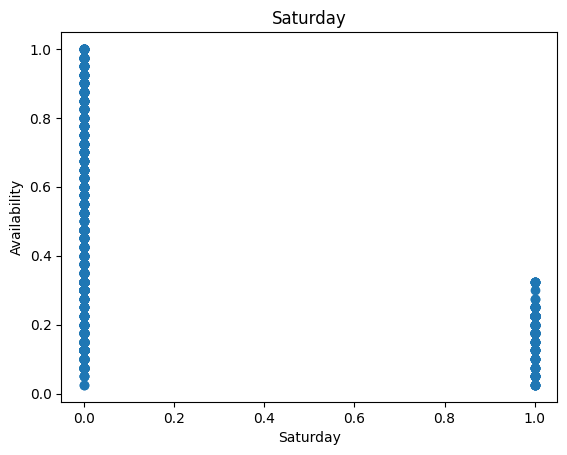

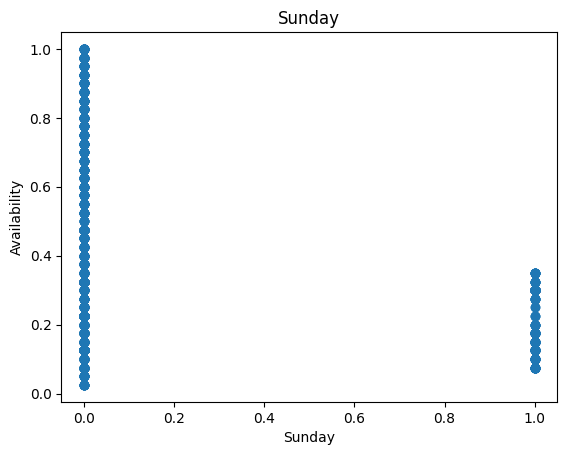

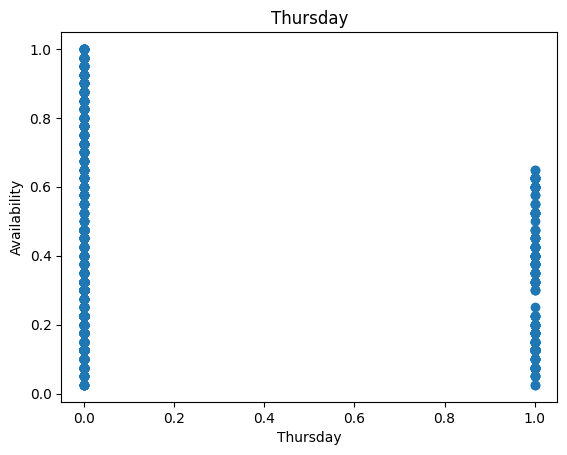

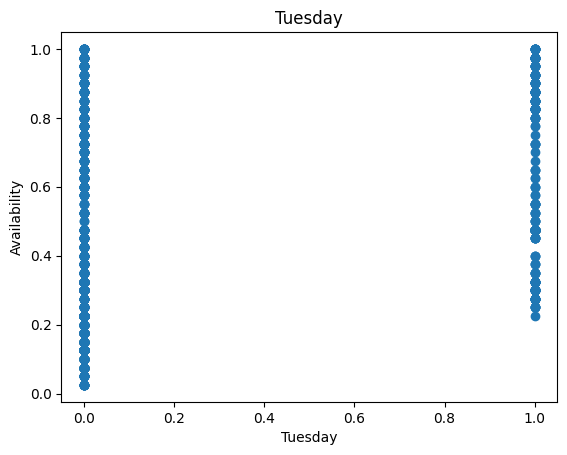

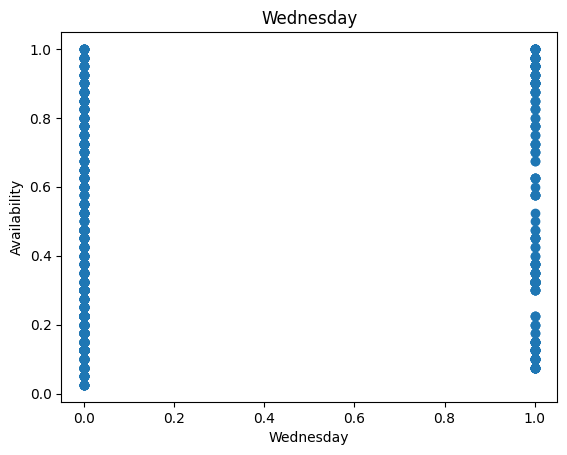

train score : 1.0


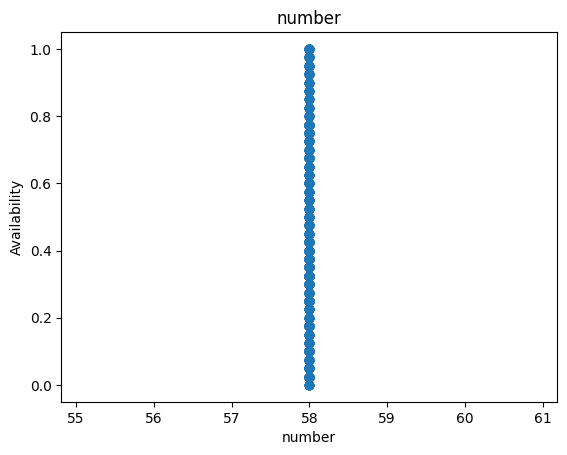

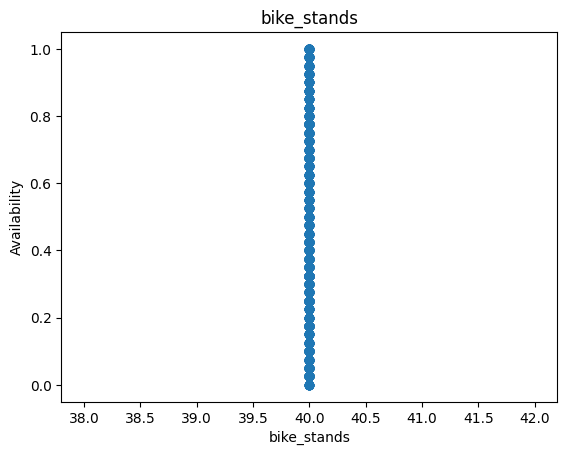

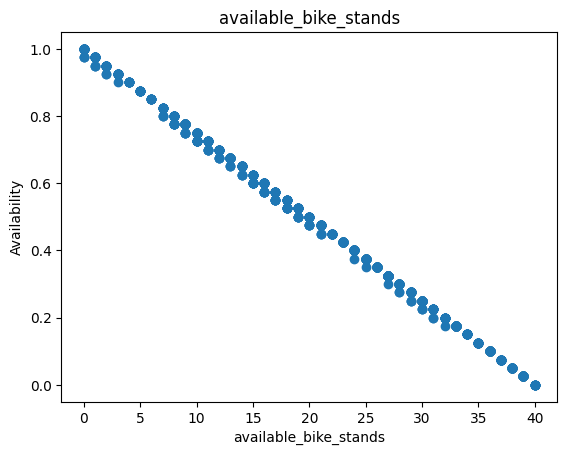

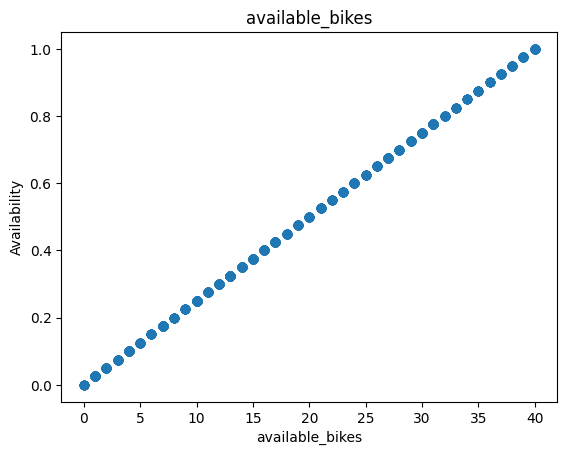

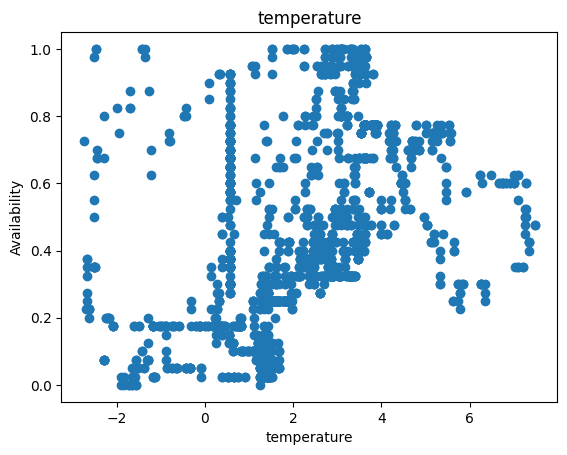

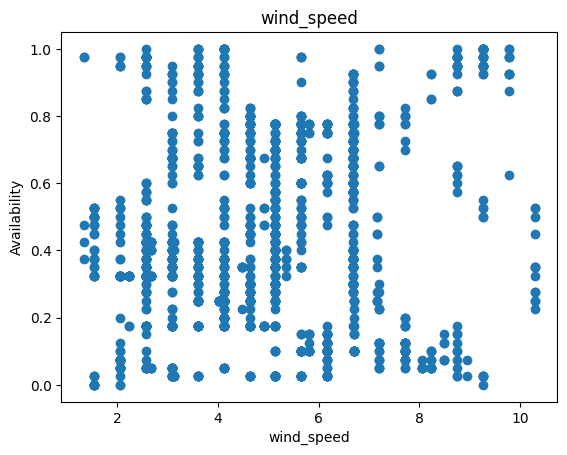

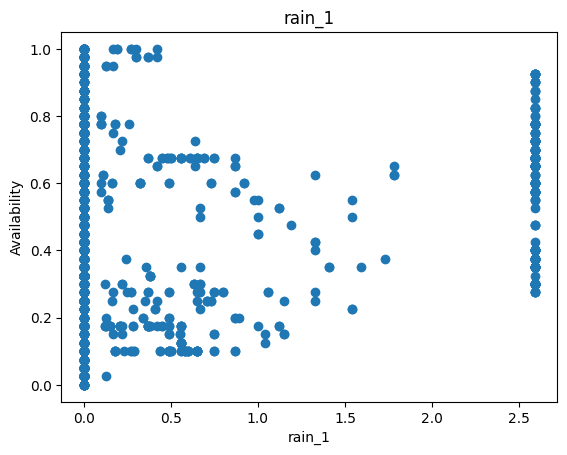

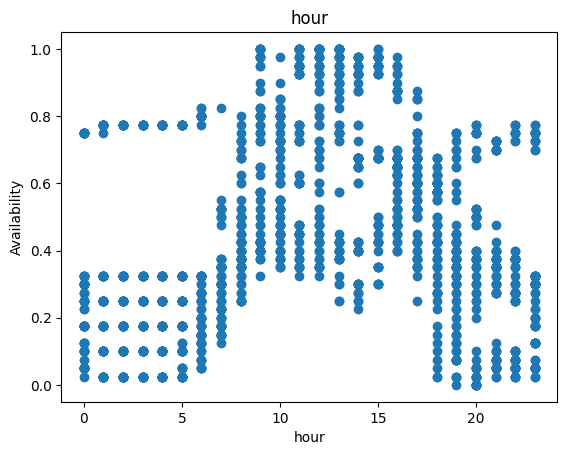

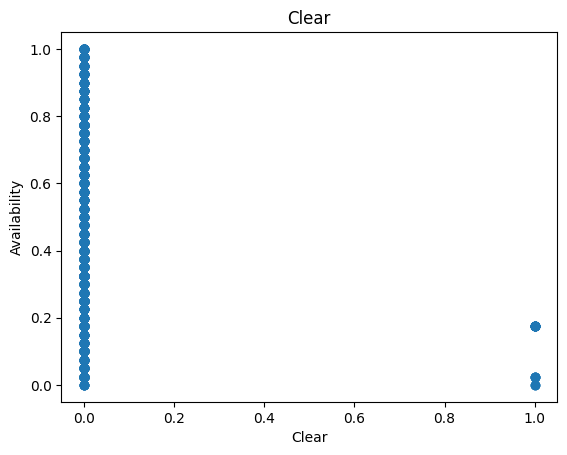

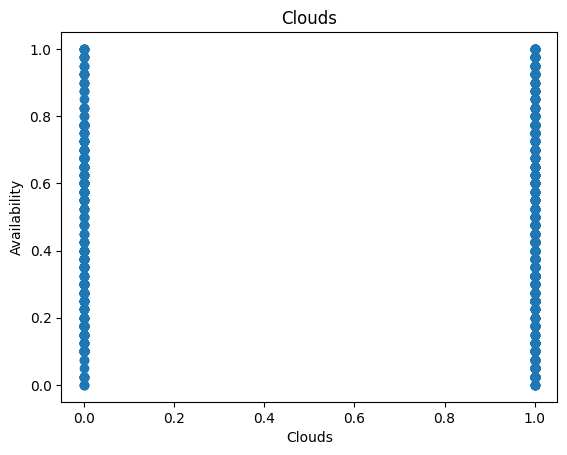

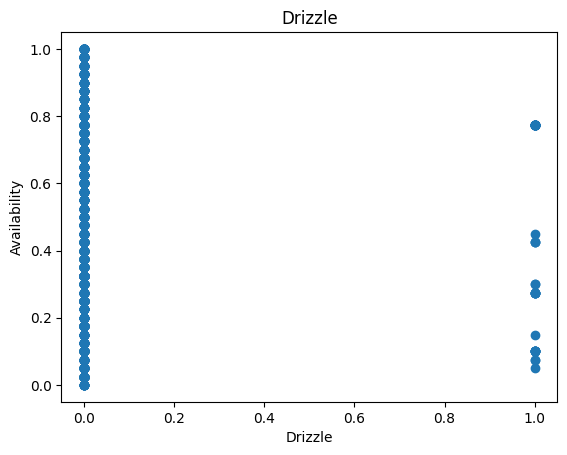

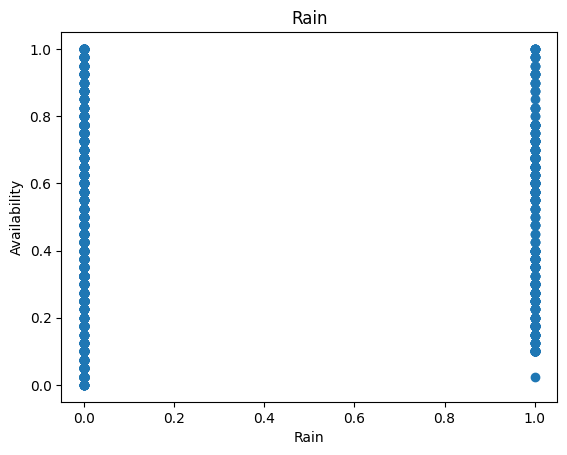

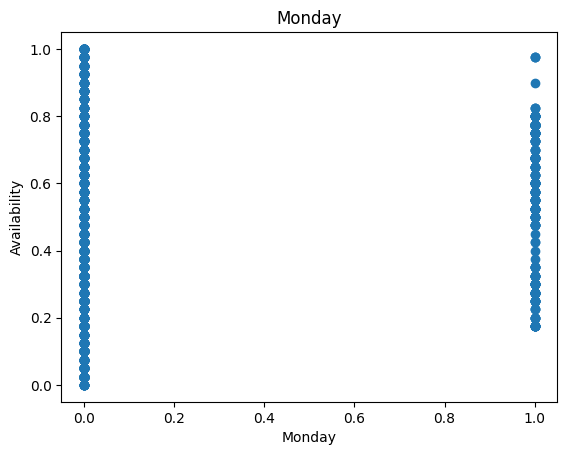

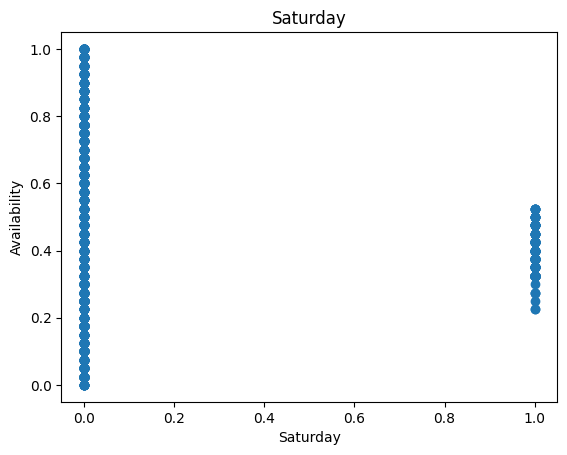

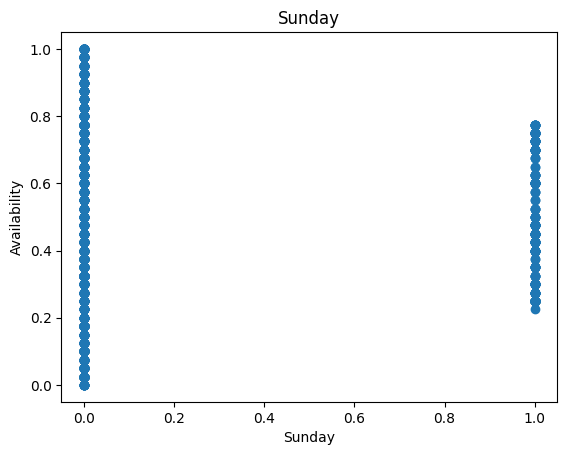

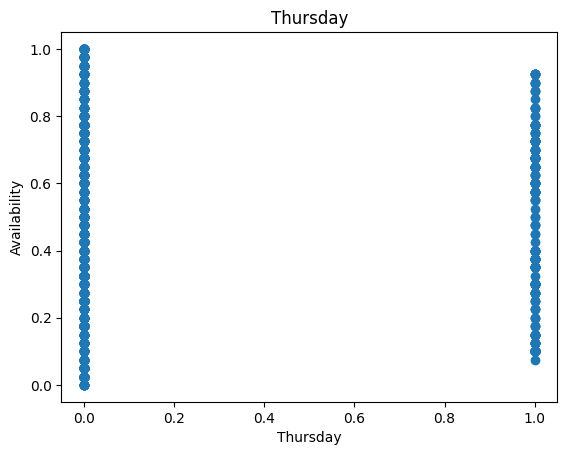

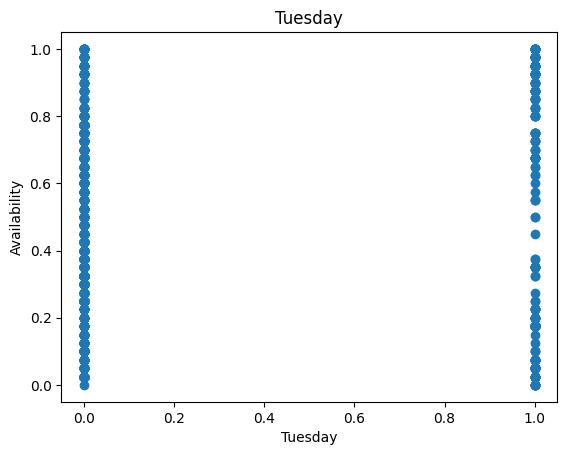

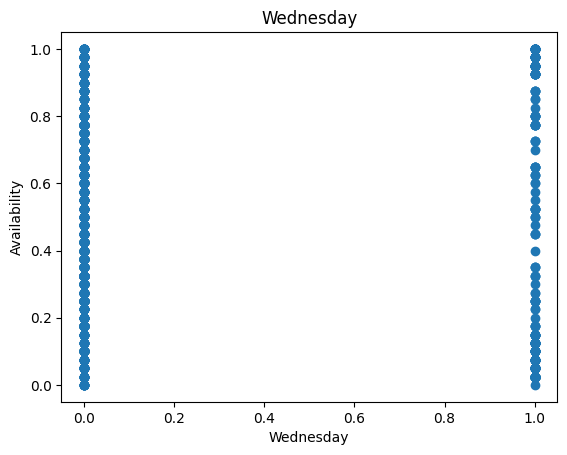

train score : 1.0


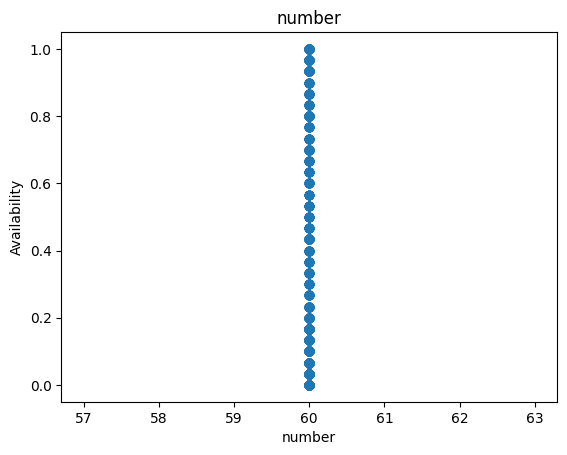

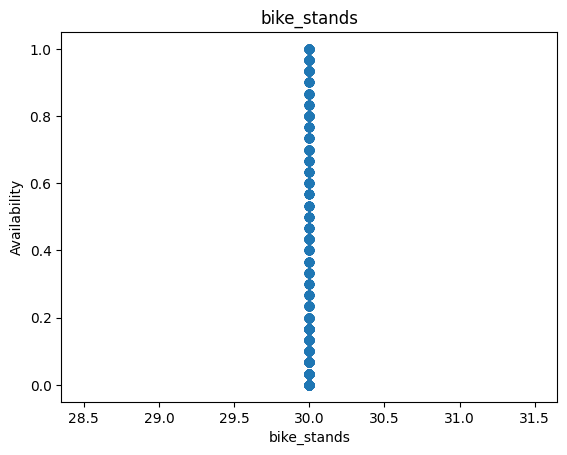

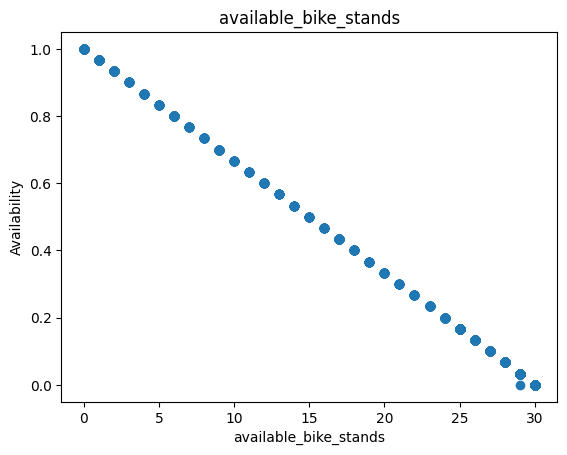

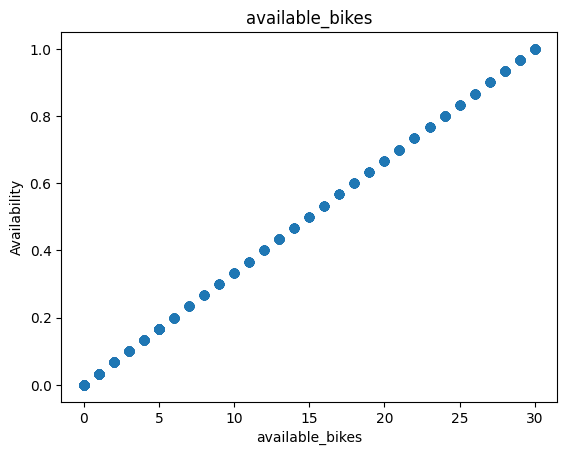

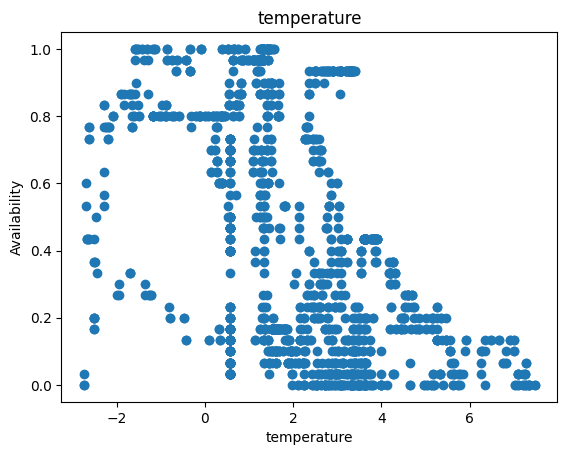

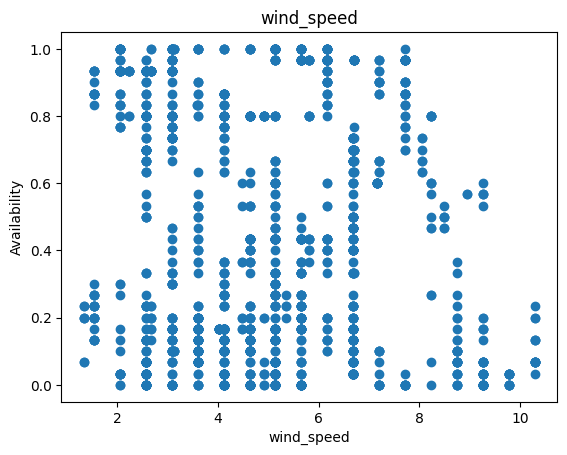

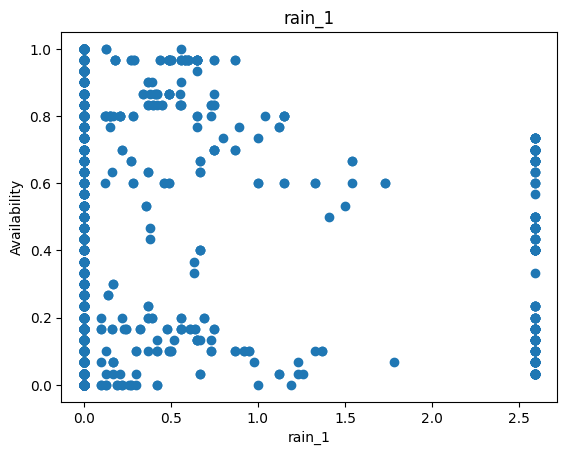

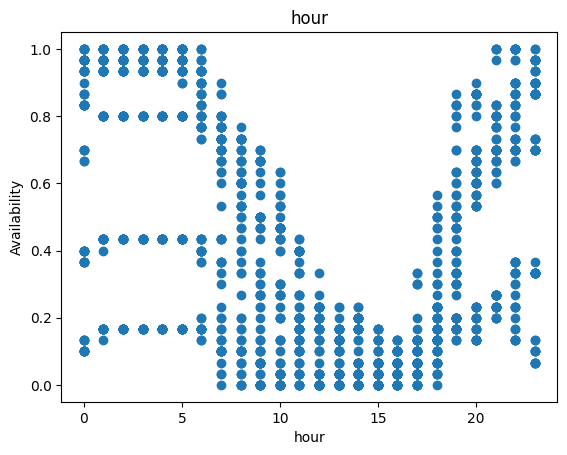

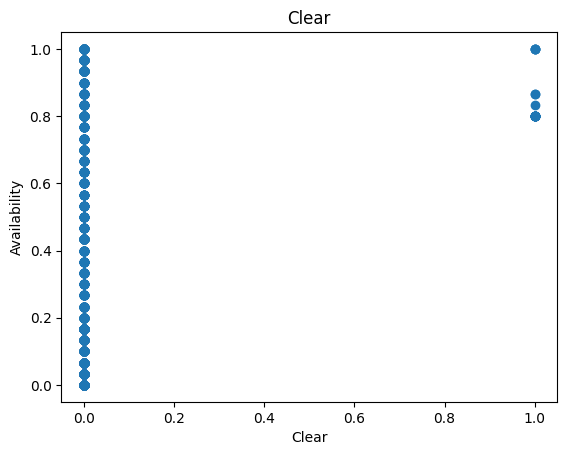

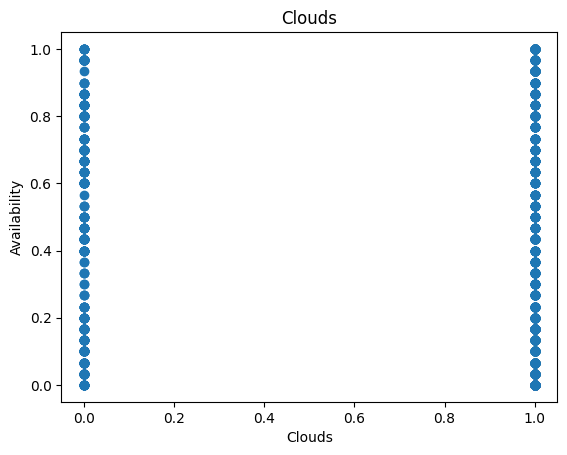

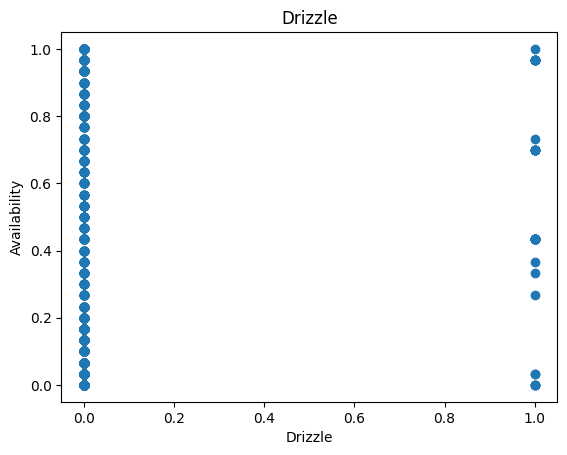

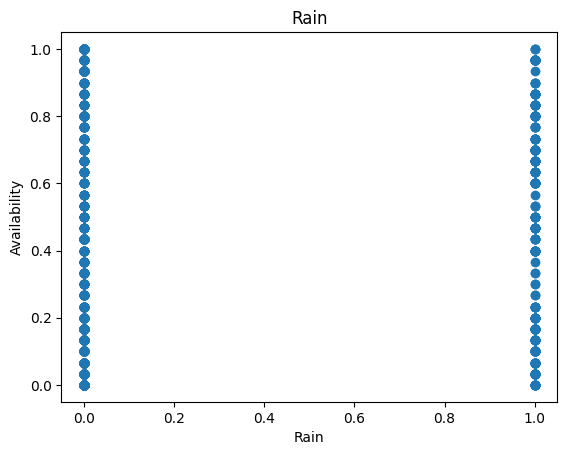

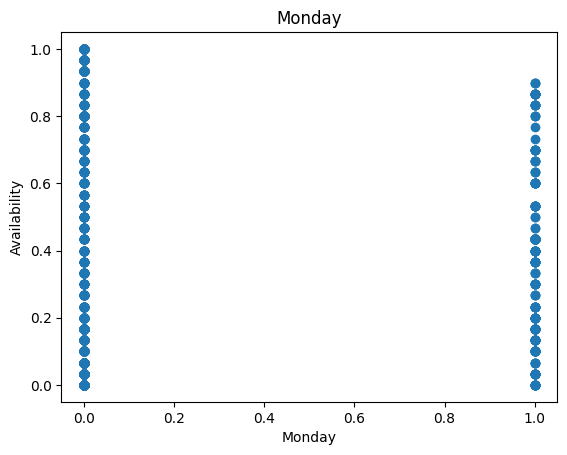

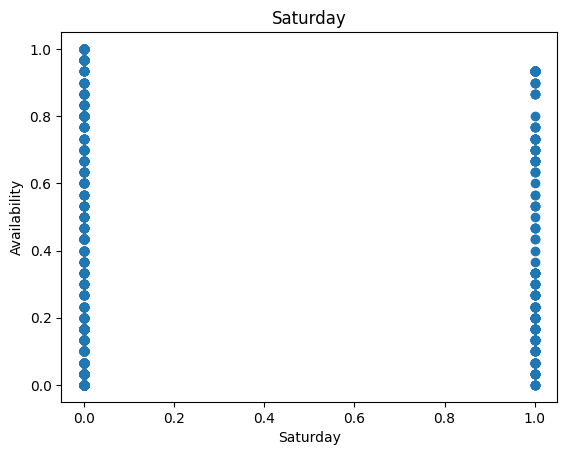

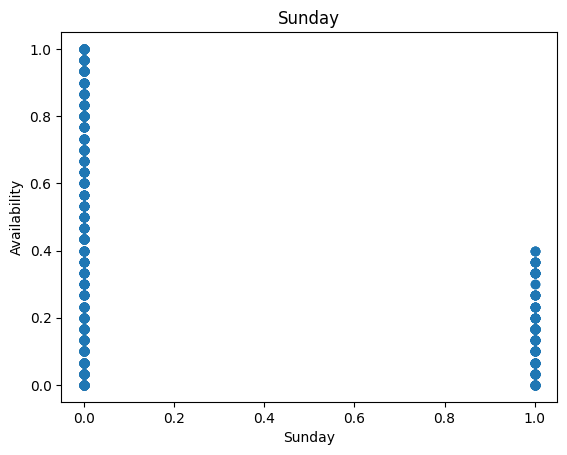

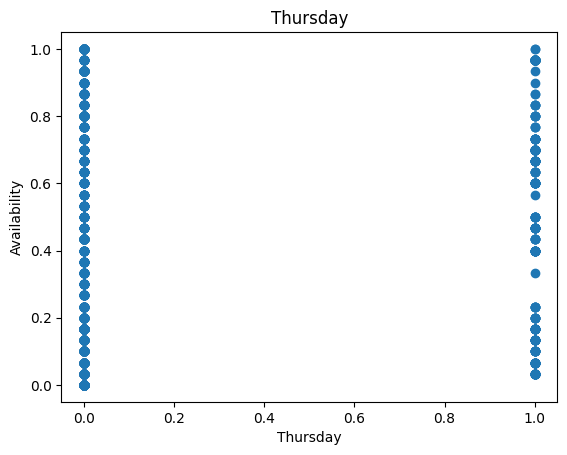

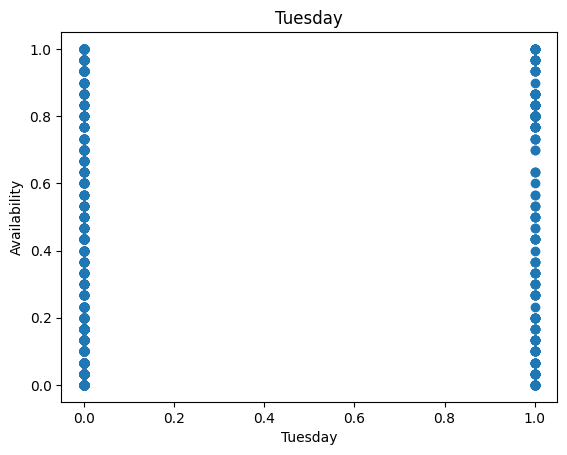

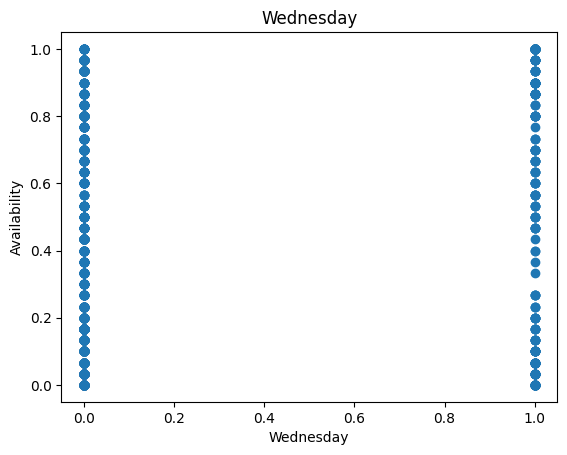

train score : 1.0


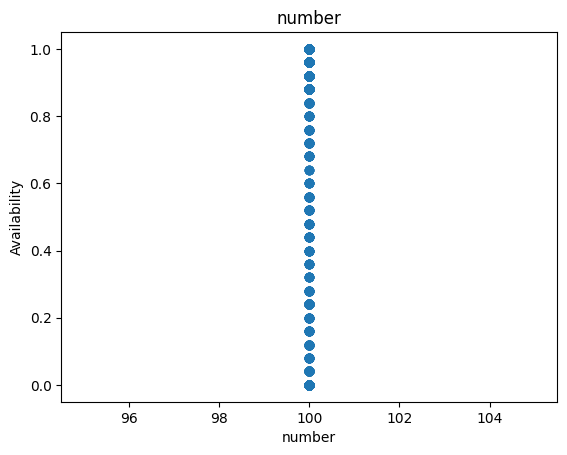

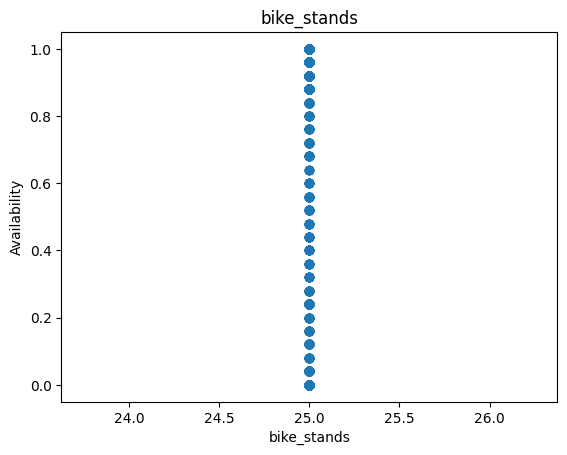

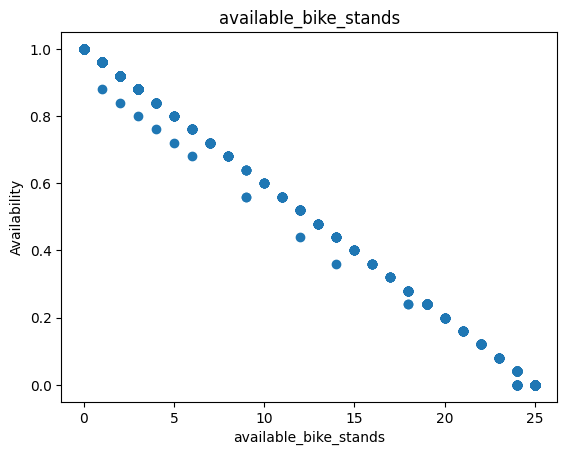

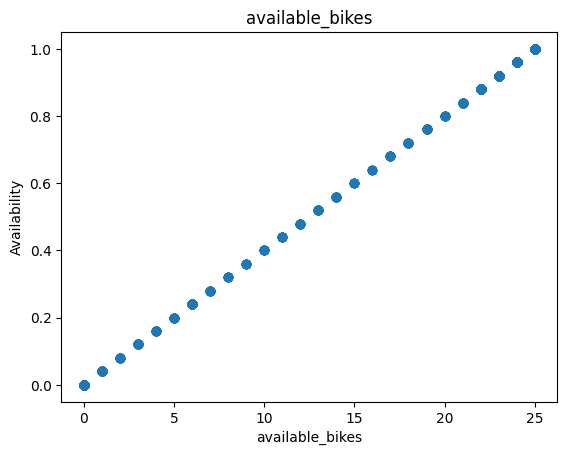

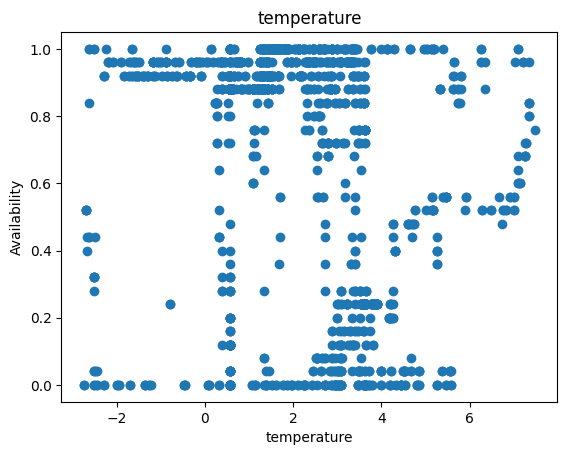

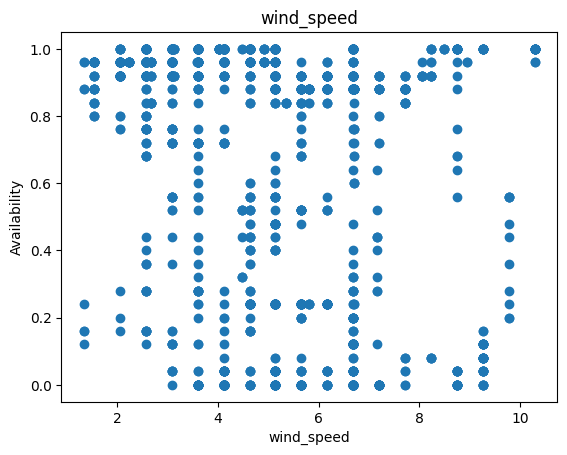

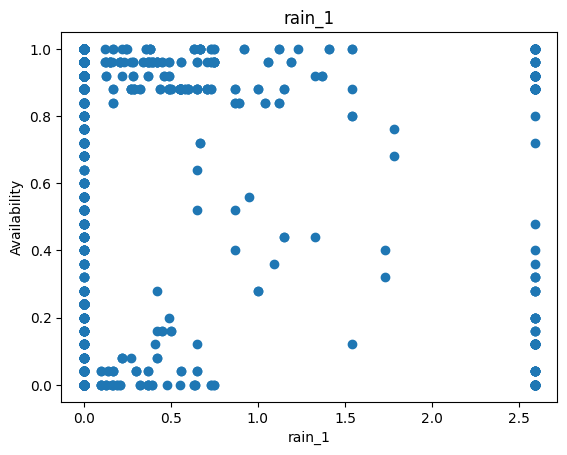

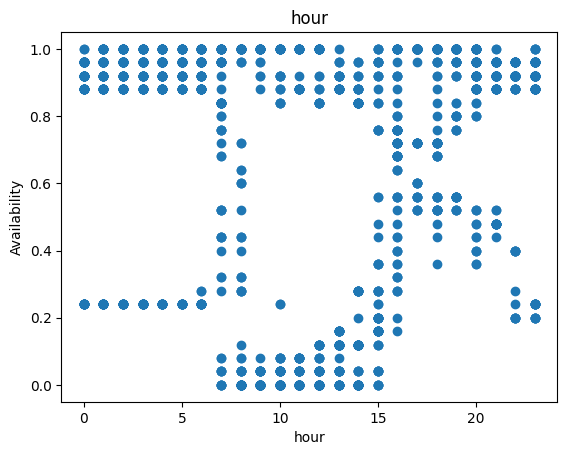

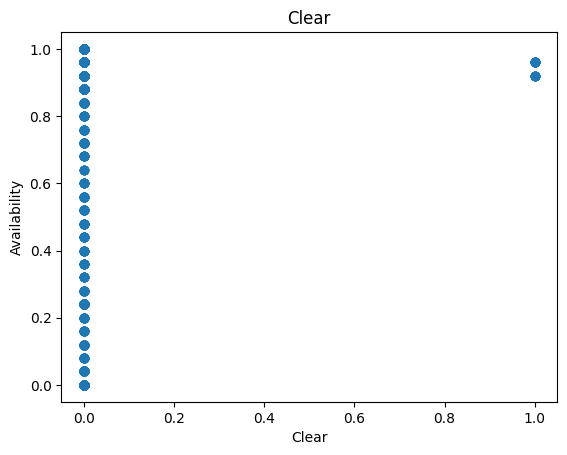

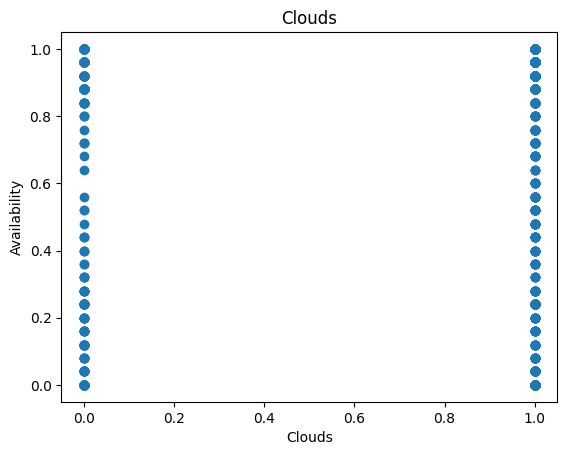

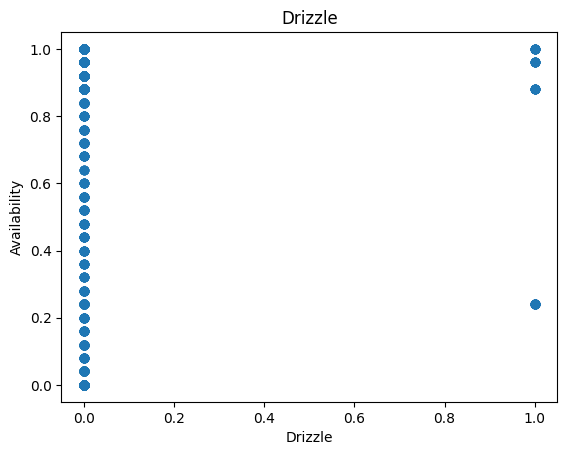

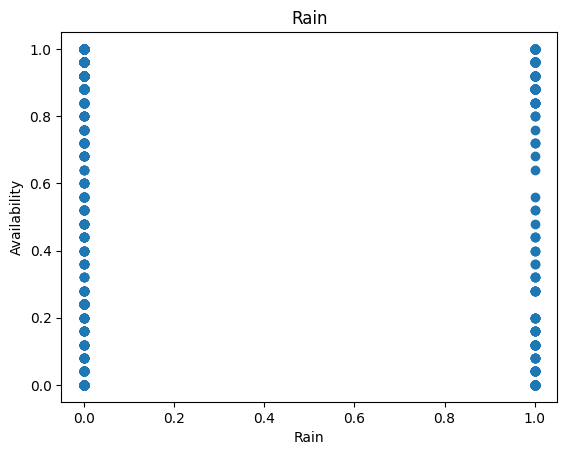

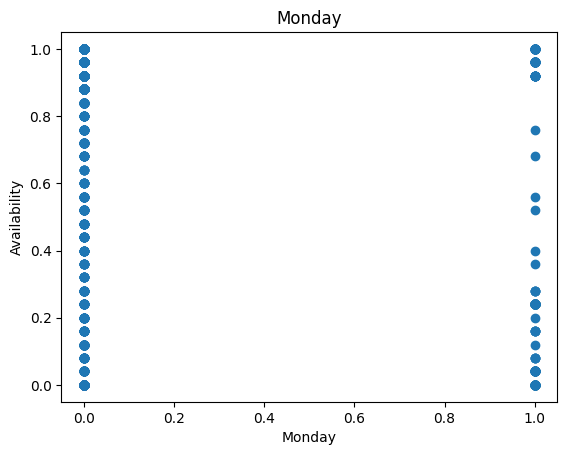

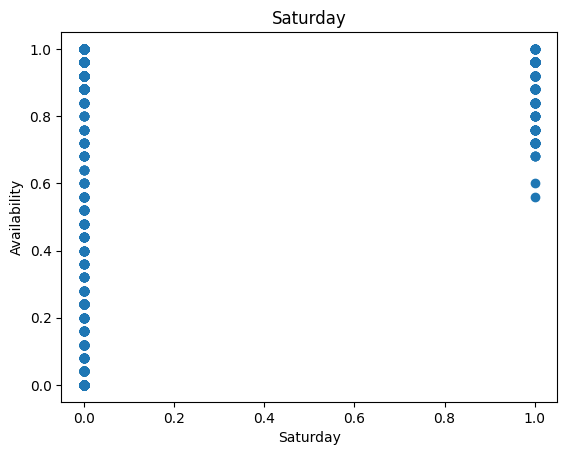

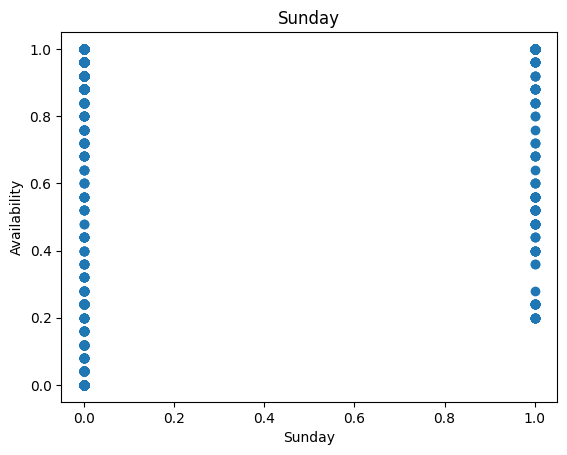

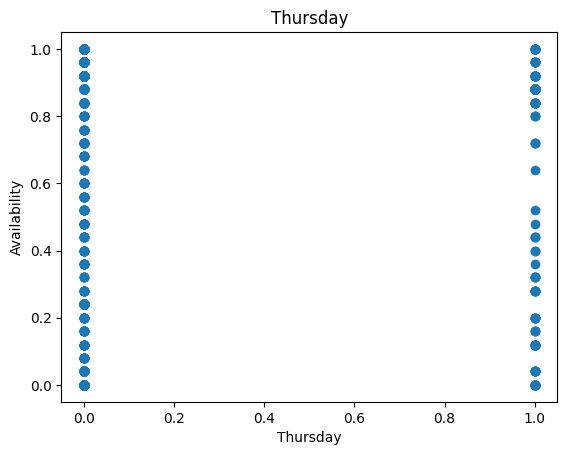

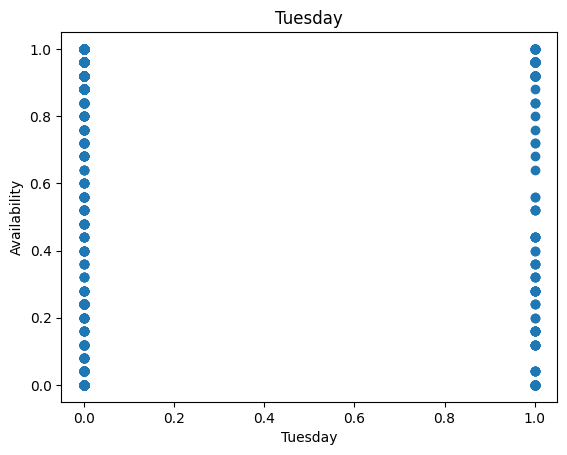

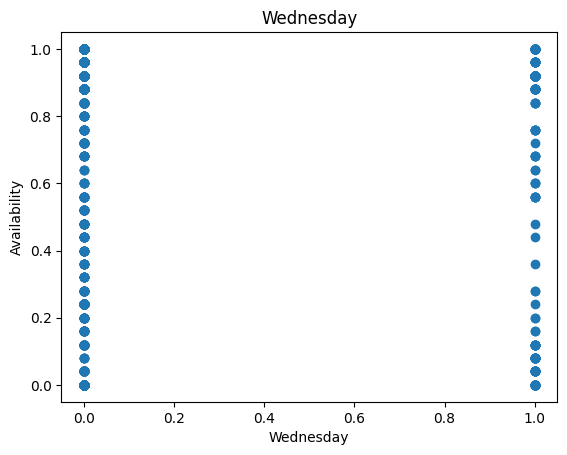

train score : 1.0


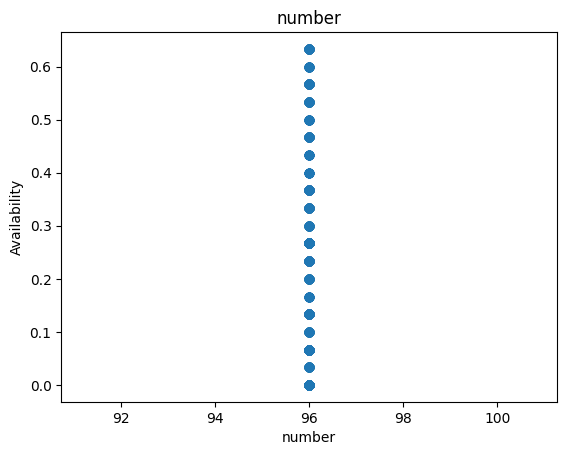

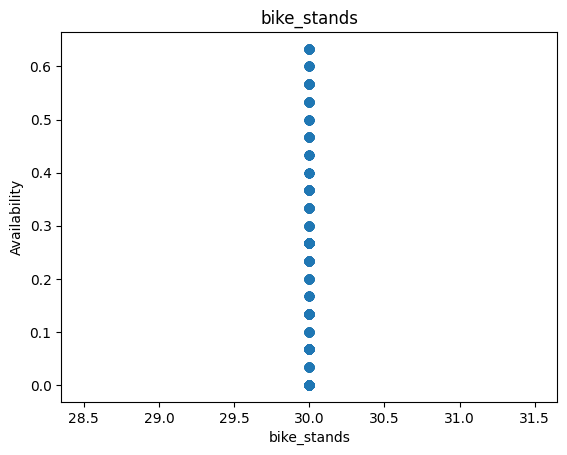

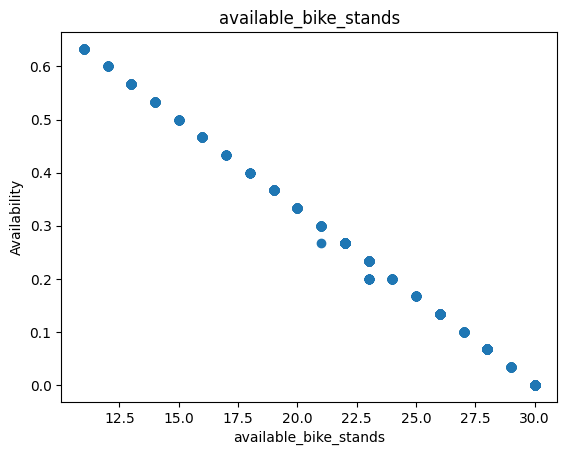

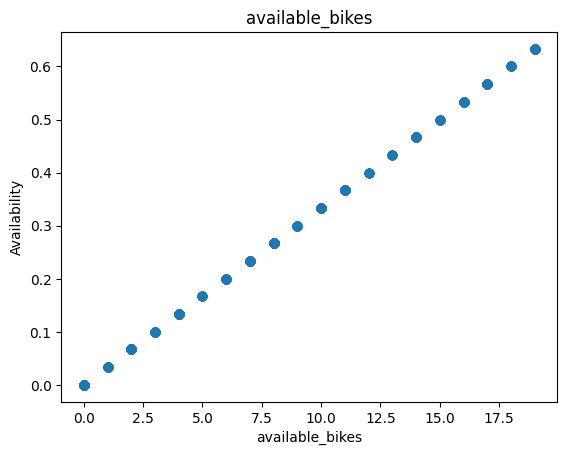

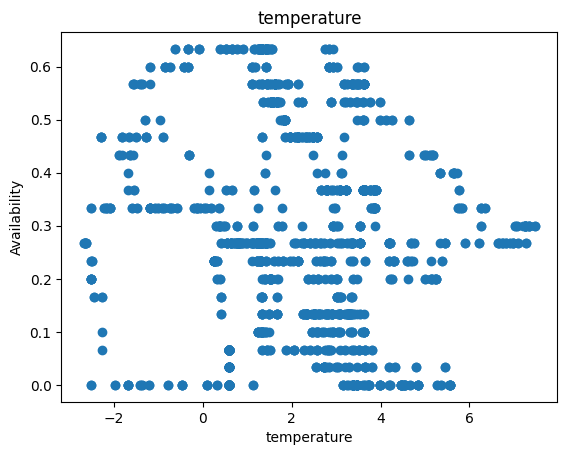

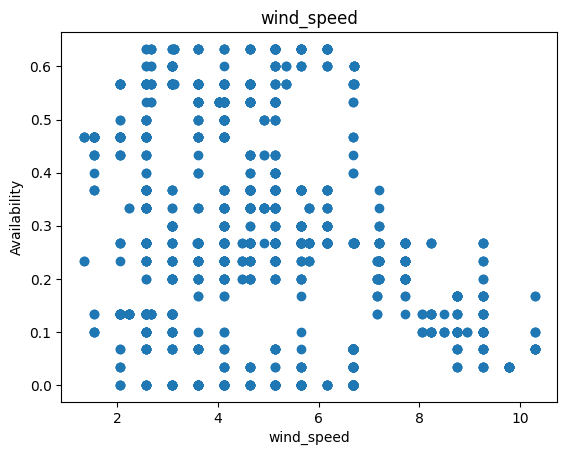

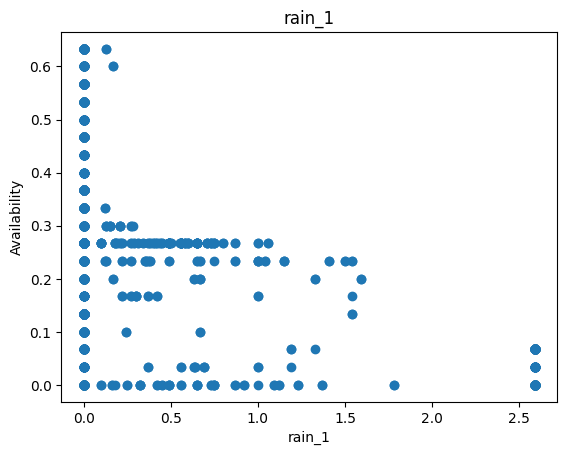

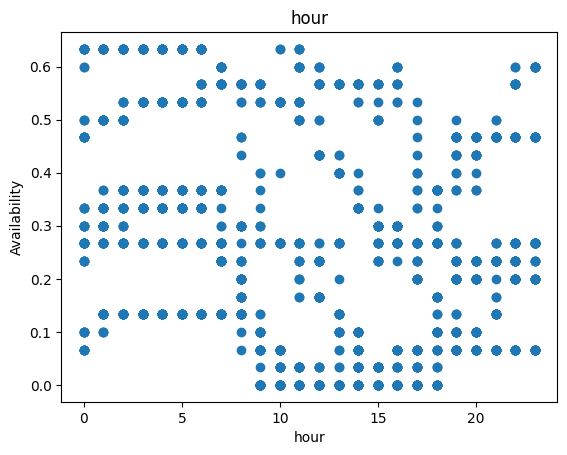

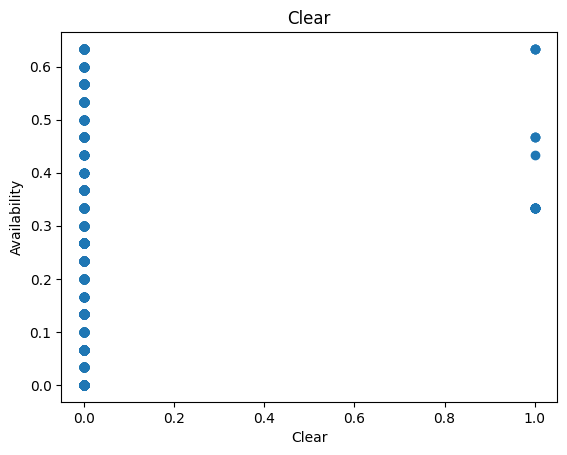

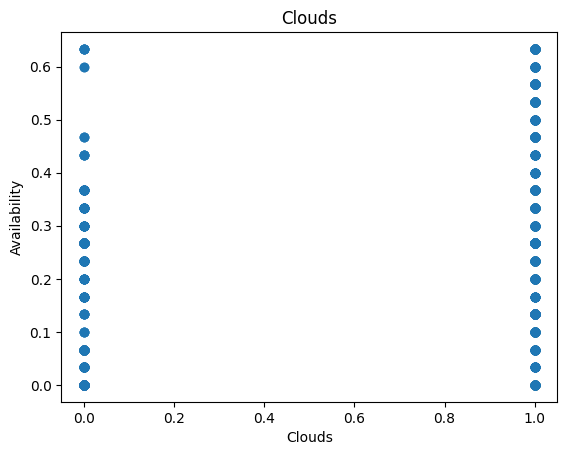

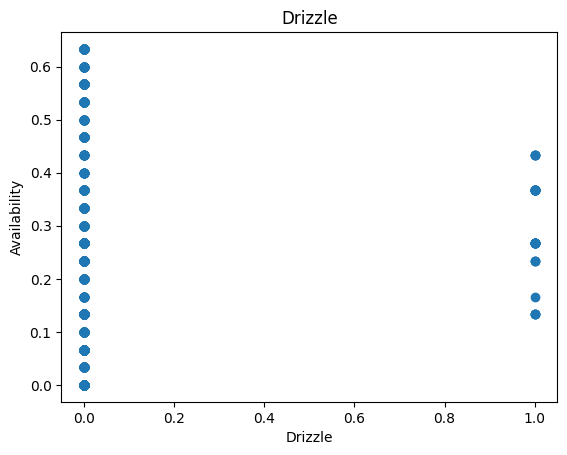

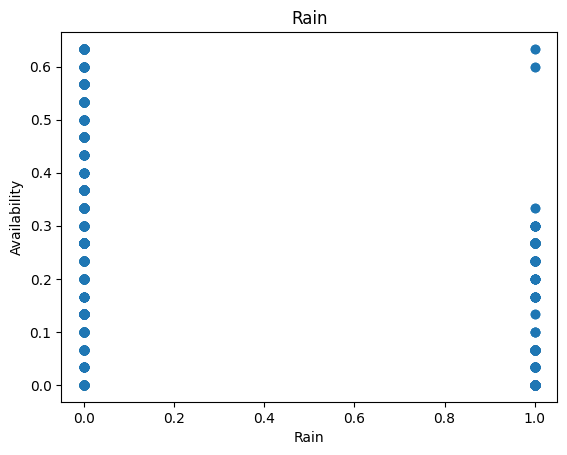

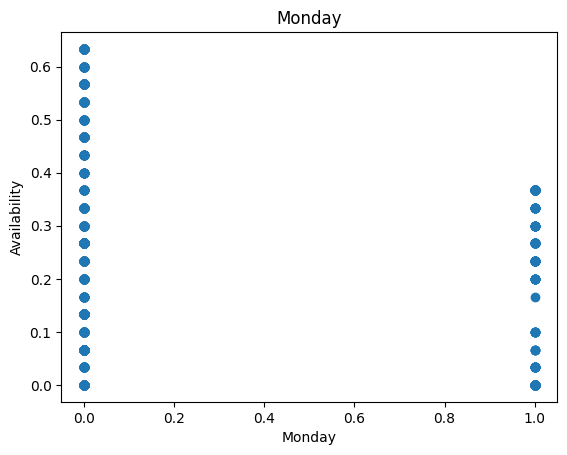

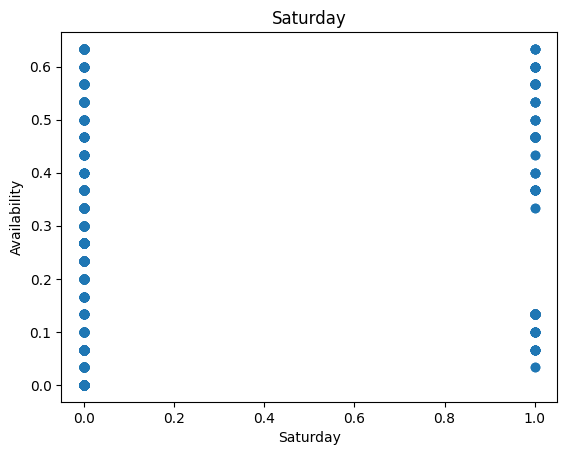

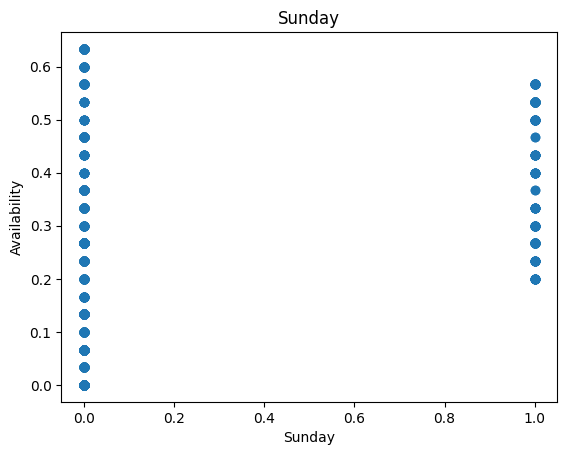

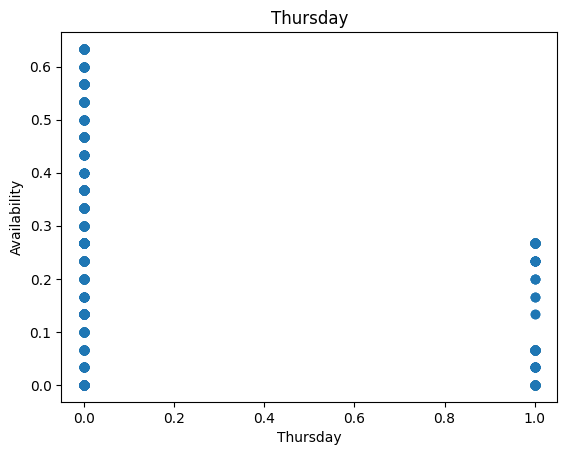

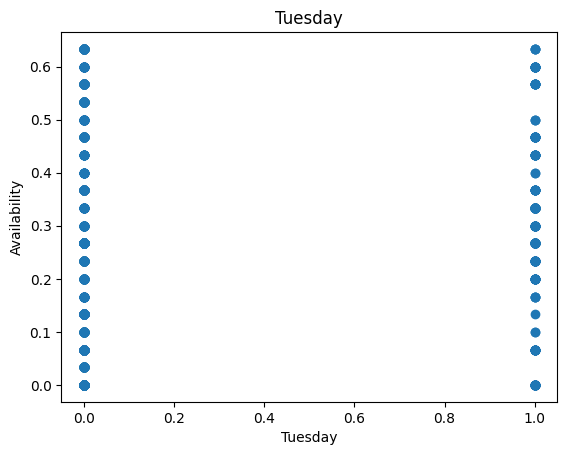

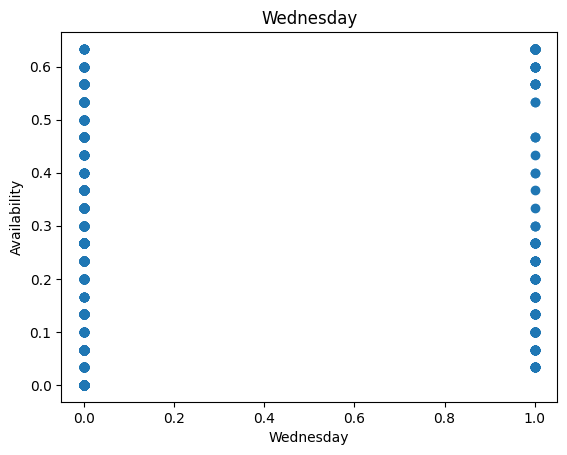

train score : 1.0


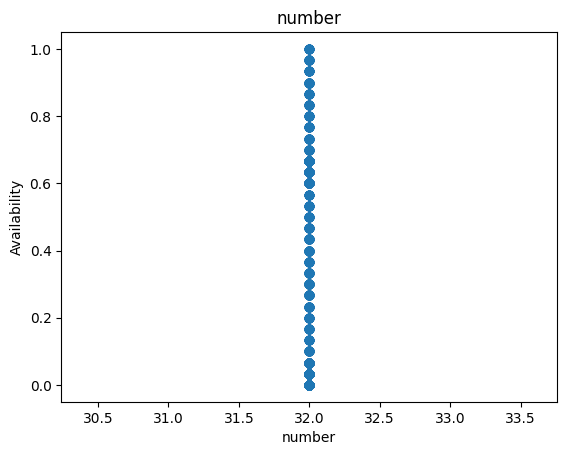

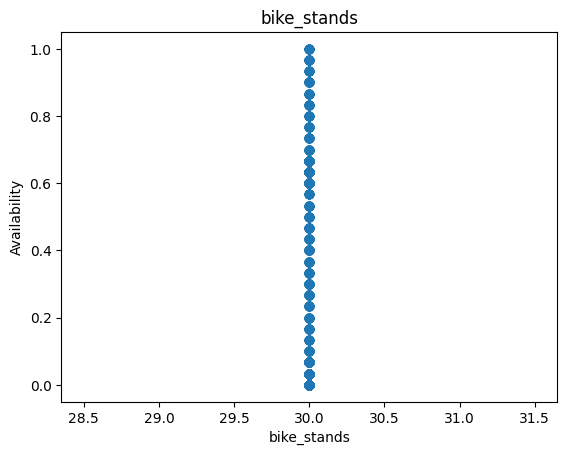

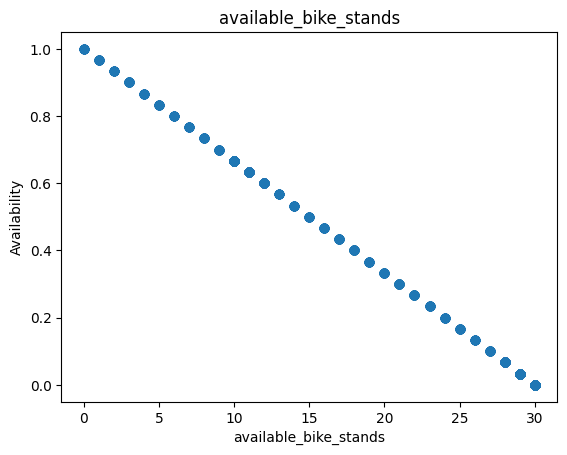

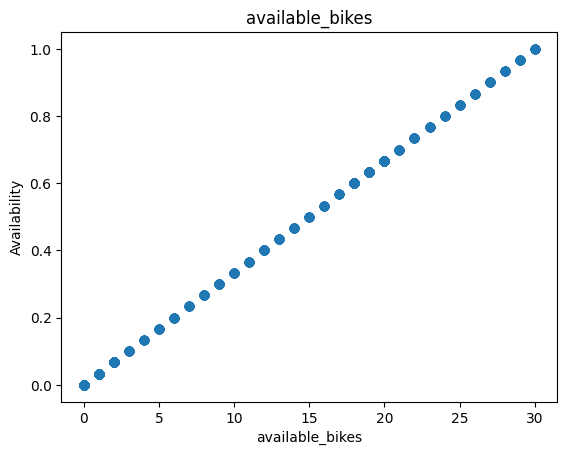

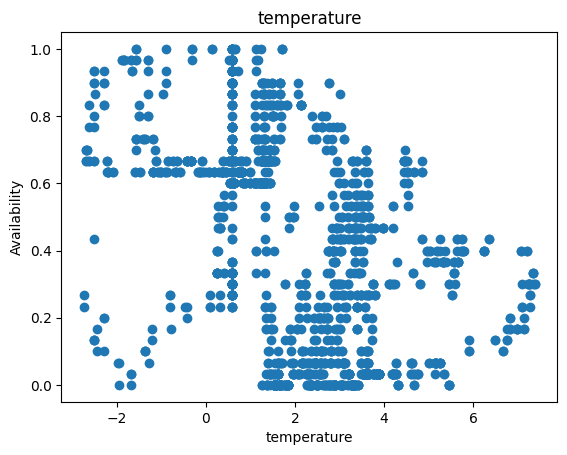

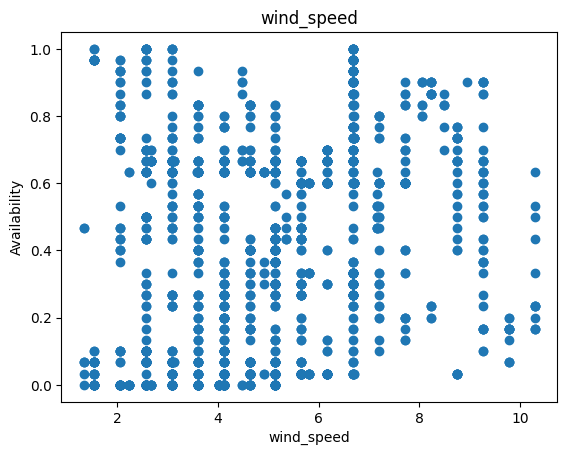

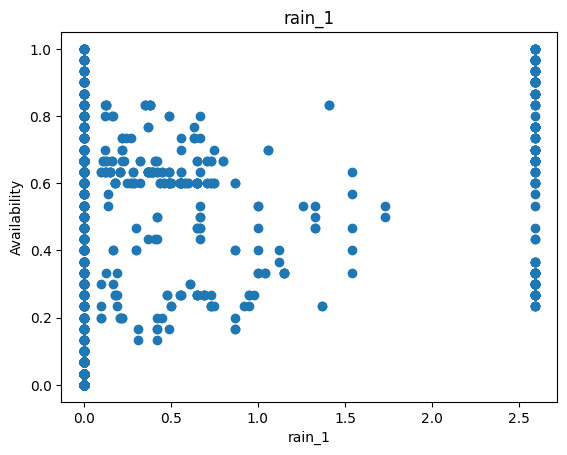

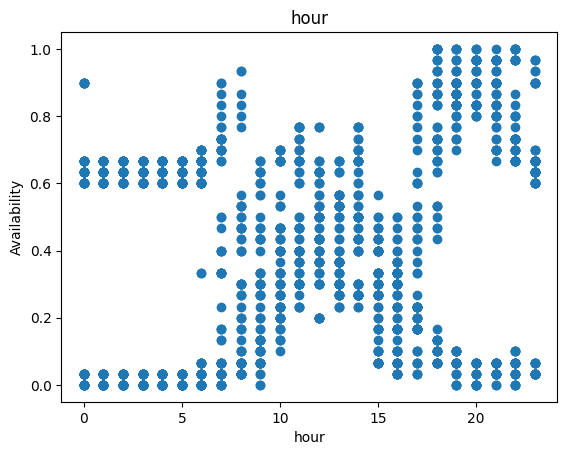

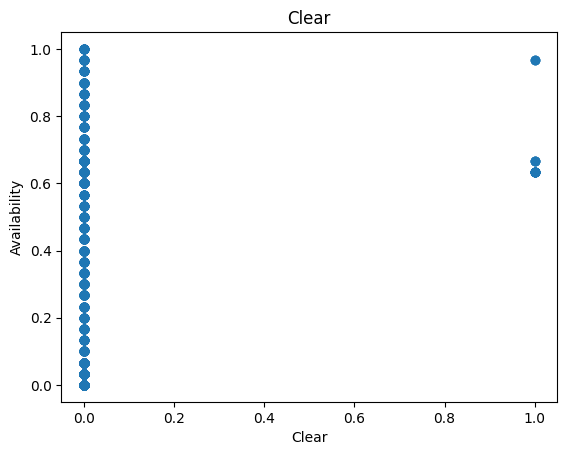

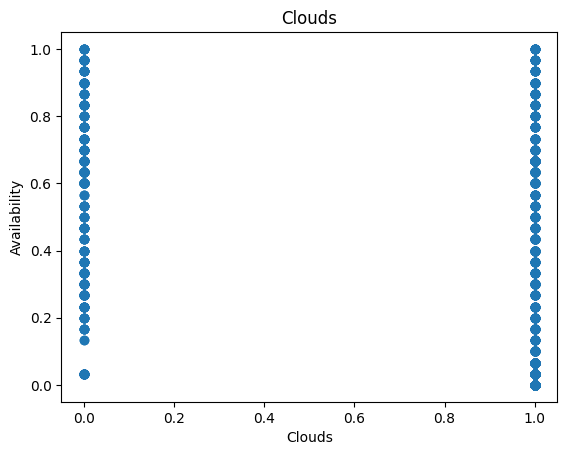

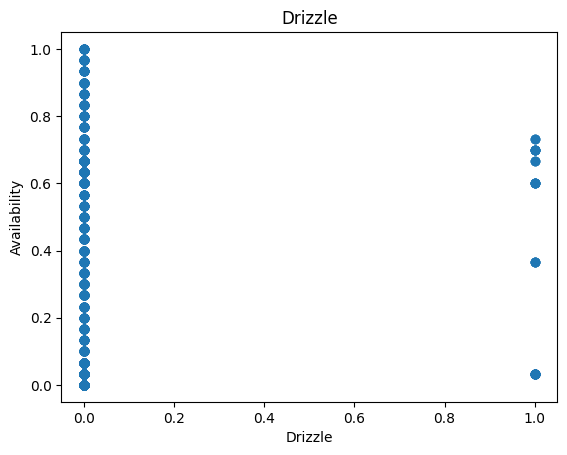

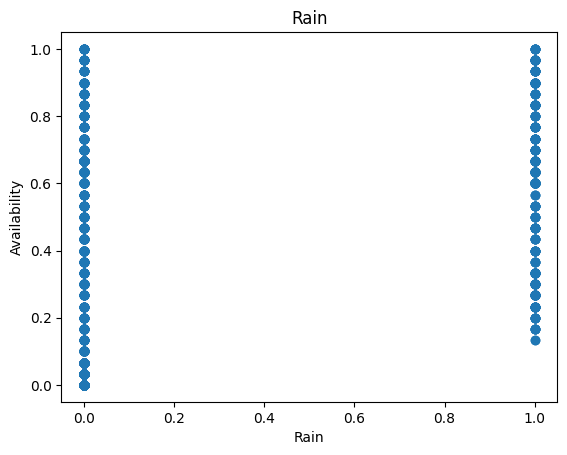

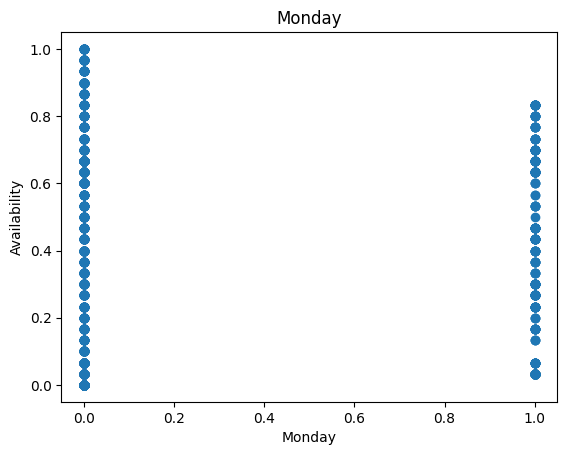

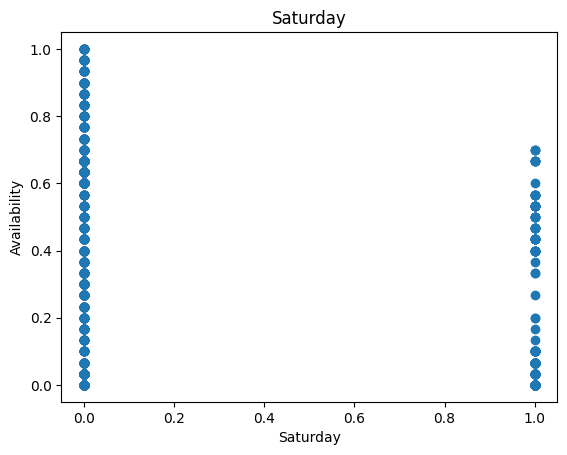

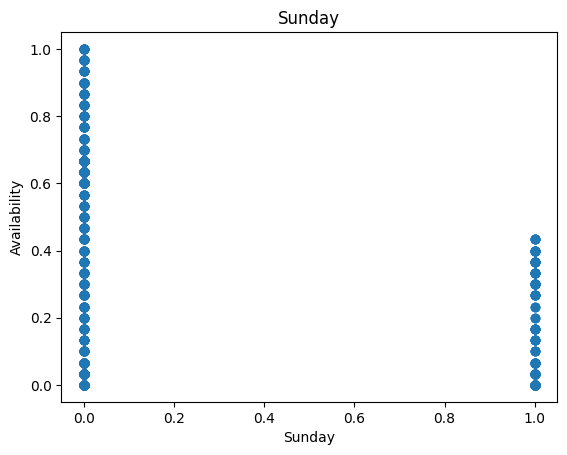

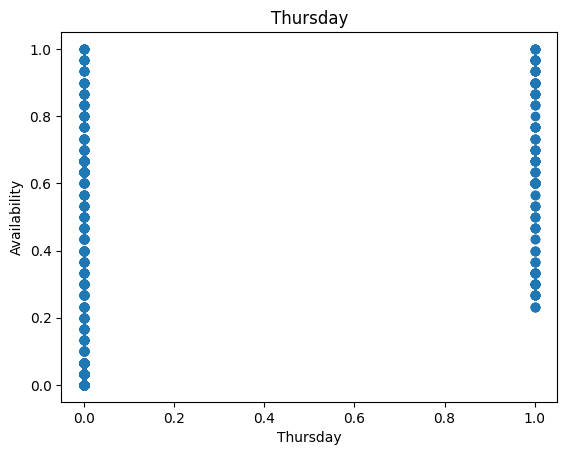

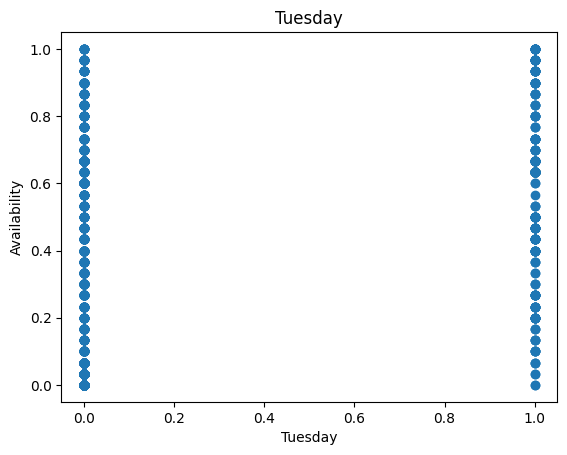

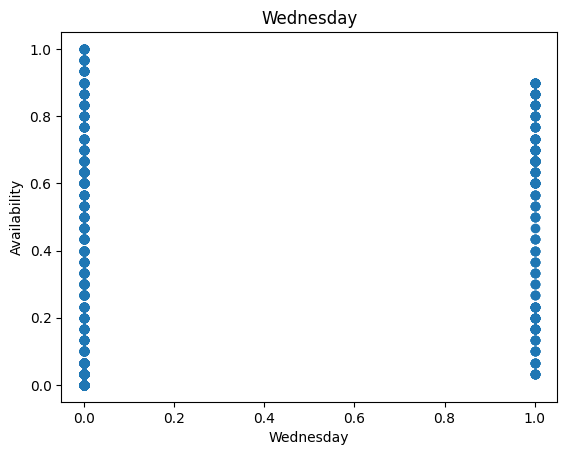

train score : 1.0


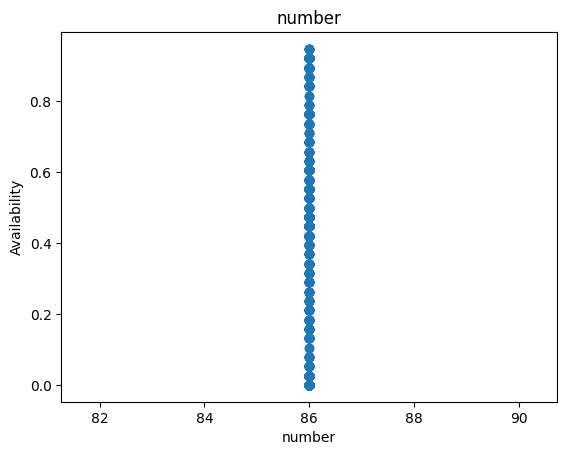

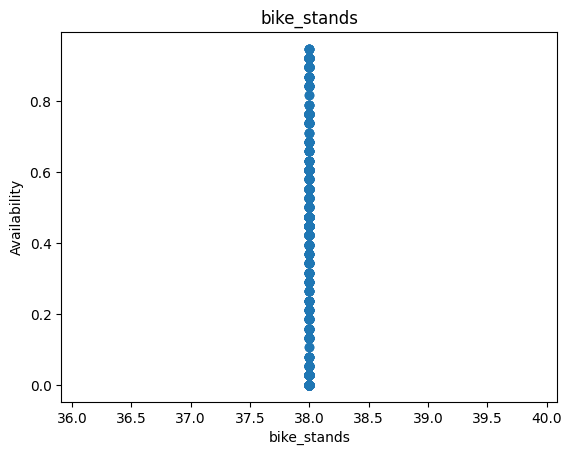

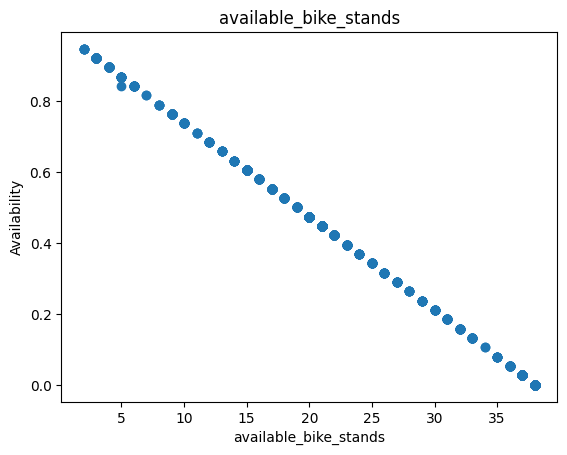

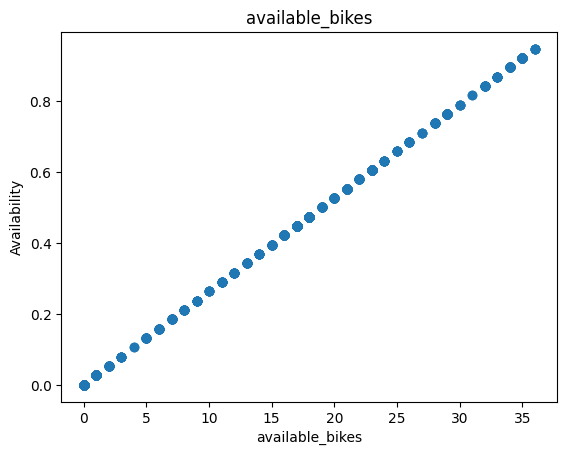

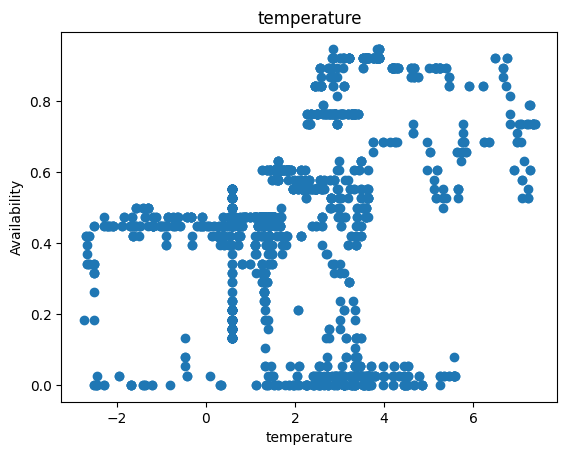

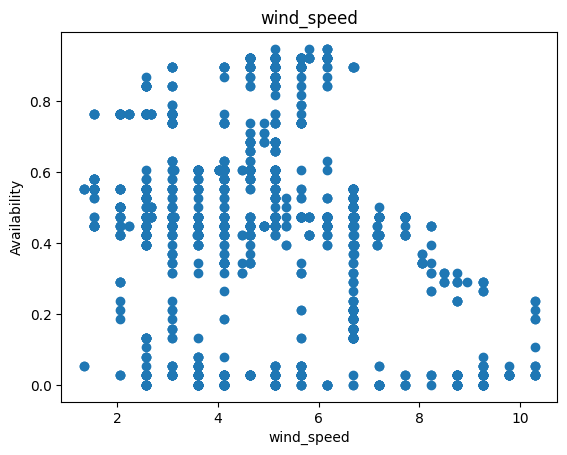

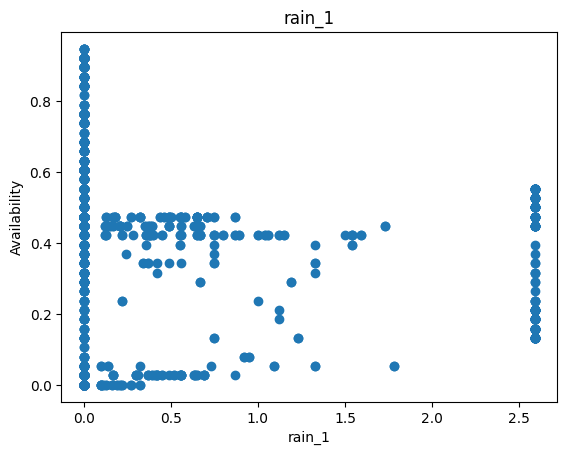

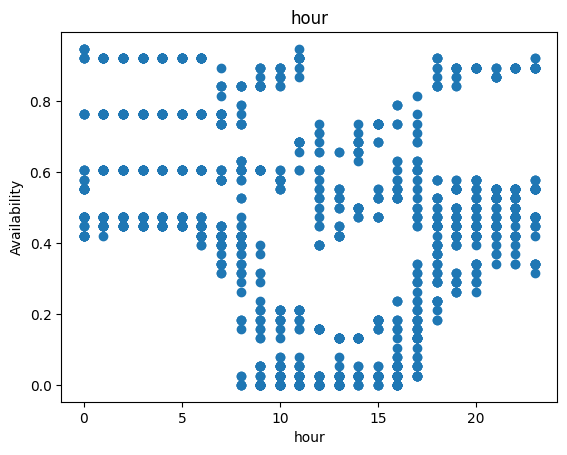

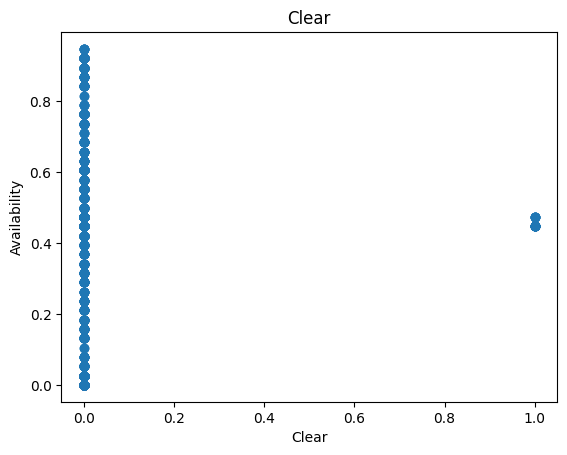

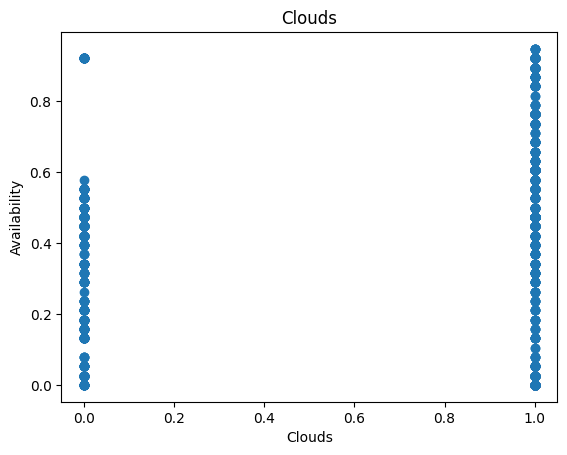

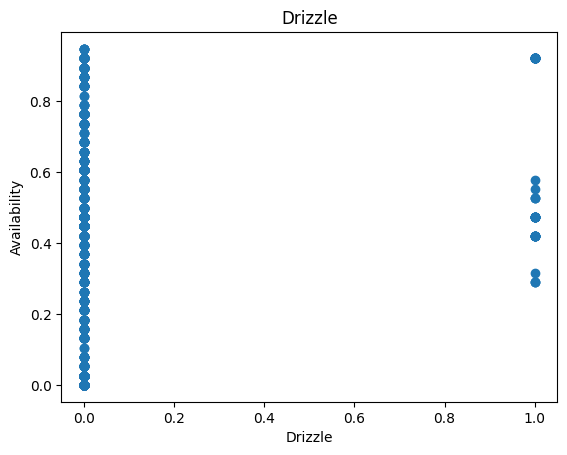

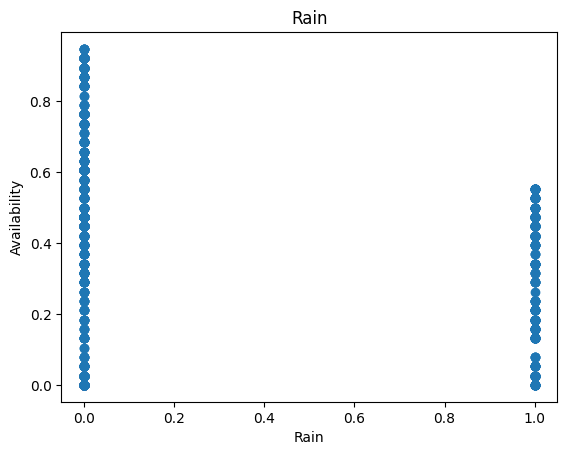

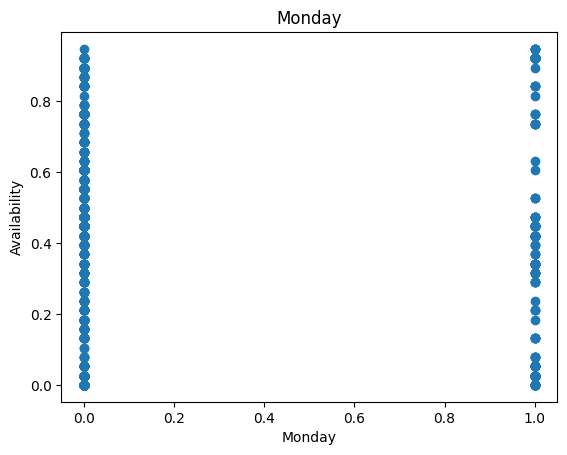

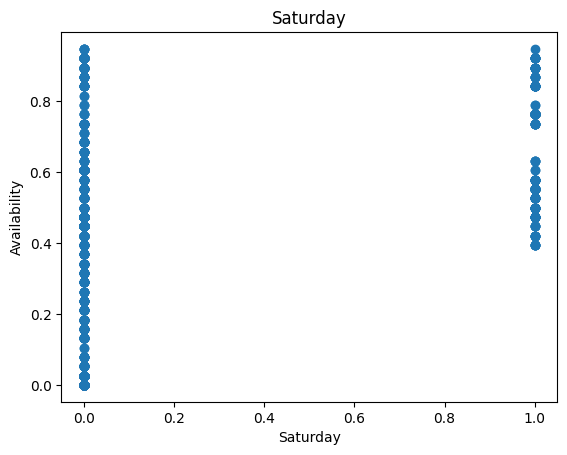

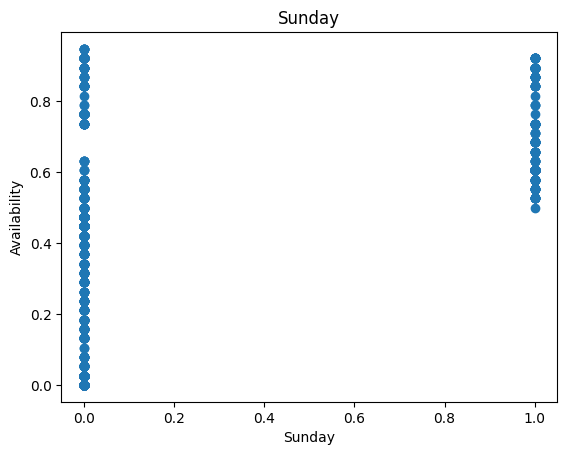

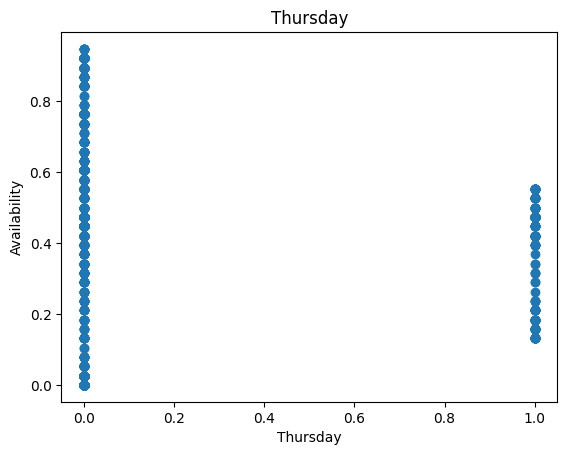

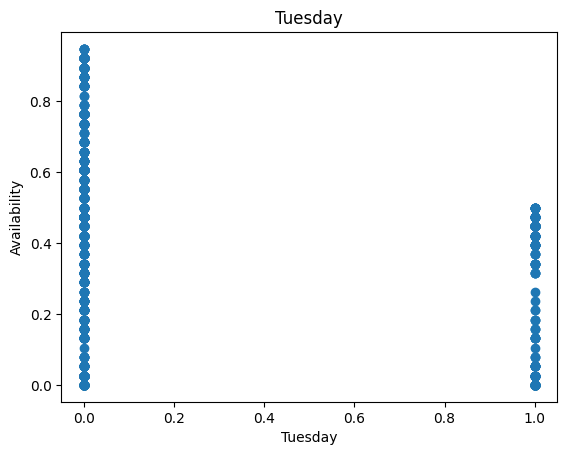

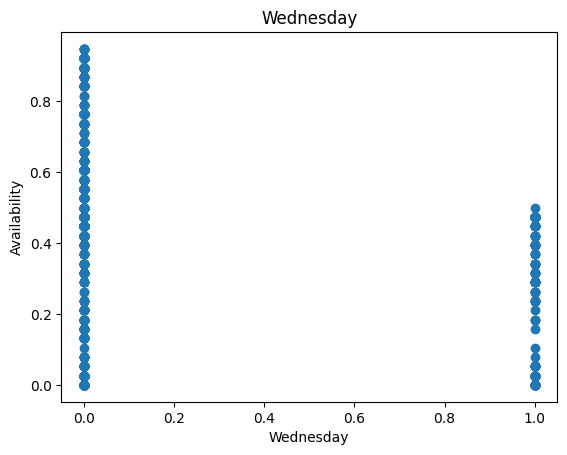

train score : 1.0


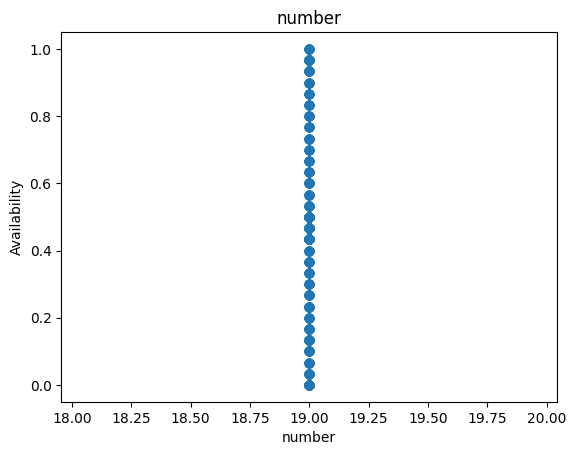

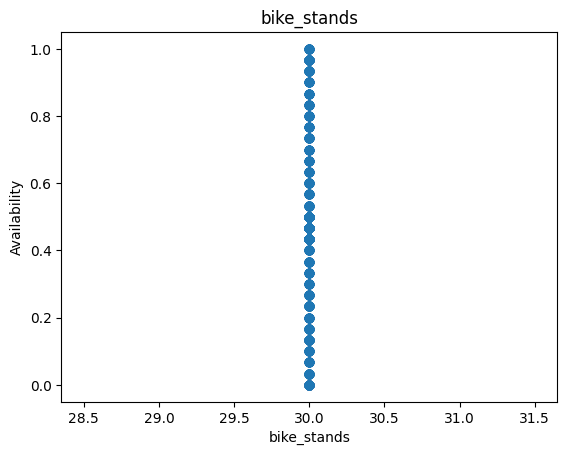

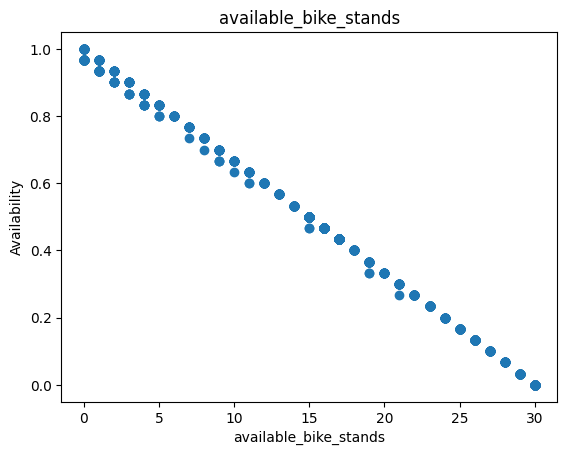

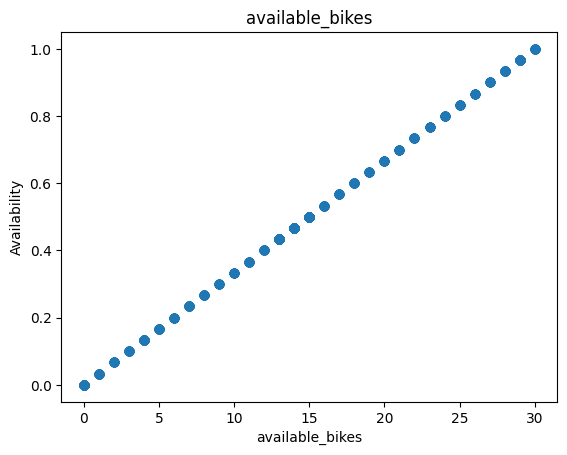

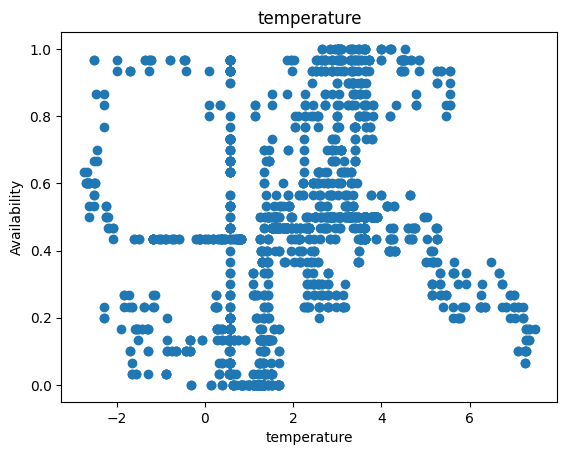

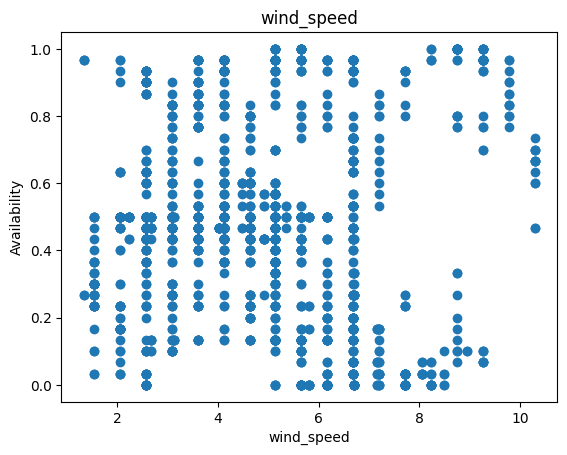

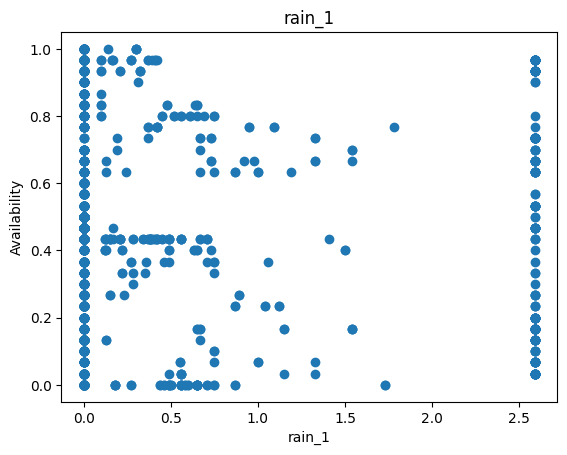

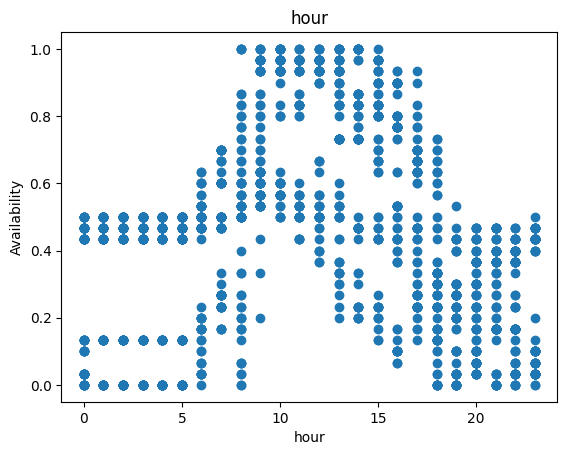

KeyboardInterrupt: 

In [98]:
for station_number in df_main["number"].unique():
    df_station, x_train, y_train = divide_data(station_number, df_main)
    model = training_model(x_train, y_train)
    save_model(model, station_number)
    check_xy(x_train, y_train)
    